# $\mu E_{BV}R_\lambda$ calibration toolkit for Cepheids

## Dataset Details
Edit './data/datamapping.py' file for switching between dataset and related adjustments.

In [1]:
from data.datamapping import k,s, z, flags, wes_show, del_mu, data_dir, process_step, data_out,img_out_path, plots
from data.datamapping import file_name, data_cols, dis_list, dis_flag, R, mag, colors
from lvtlaw.a_utils import data_dir, data_out
from lvtlaw.a_utils import output_directories, image_directories, load_data, colprint
from lvtlaw.h_loadoutput import *

#import pandas as pd, matplotlib.pyplot as plt

dis = dis_flag[0]
flag = flags[0]

print(f'\nFile Overwrite: {"Yes" if s == 1 else "No" if s == 0 else "check a_utils.py"} (s = {s})')
print(f'\nDatafile location : ./leavitt_law/data/input/{file_name}.csv (k = {k})')
print(f'\nPhotometry Bands: {mag}')
print(f'\nDistance label: {dis}')
print(f'\nWesenheit Index: {wes_show}')
print(f'\nCalibration Method: {"Madore" if flag == "M" else "Shubham" if flag == "S" else "check a_utils.py"}')
print(f'\nReddening Law (Fouque 2007): {R}')


* * datamapping module loaded!
* * a_utils module loaded!
* * datamapping module loaded!

File Overwrite: Yes (s = 1)

Datafile location : ./leavitt_law/data/input/95_jesper.csv (k = 1)

Photometry Bands: ['B', 'V', 'I', 'J', 'H', 'K']

Distance label: _g

Wesenheit Index: ['BV', 'BI', 'BJ', 'BH', 'BK', 'VI', 'VJ', 'VH', 'VK', 'IJ', 'IH', 'IK', 'JH', 'JK', 'HK']

Calibration Method: Shubham

Reddening Law (Fouque 2007): {'B': 4.2313, 'V': 3.23, 'I': 1.96384, 'J': 0.9431599999999999, 'H': 0.58463, 'K': 0.38437}


# Reddening Ratio

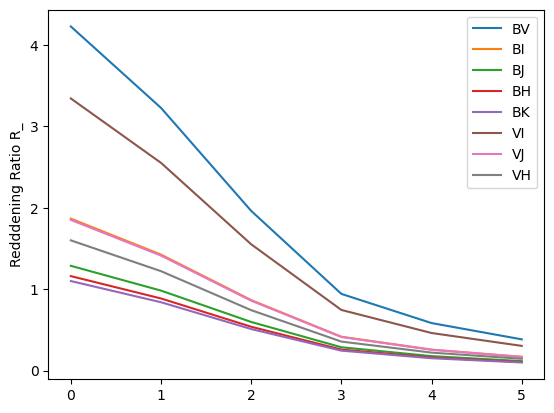

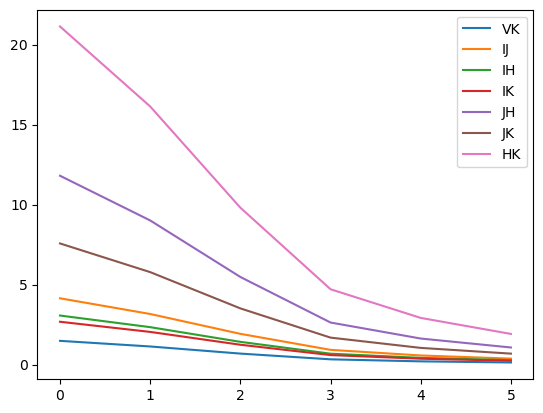

In [6]:
import matplotlib.pyplot as plt
Rm=R_()
cols = colors()
for col in cols[0:8]:
    plt.plot([x for x in range(len(mag))],[Rm[f'{m}{col}'] for m in mag], '-', label = col)
plt.ylabel('Redddening Ratio R_')
plt.legend()
plt.show()
for col in cols[8:]:
    plt.plot([x for x in range(len(mag))],[Rm[f'{m}{col}'] for m in mag], '-', label = col)
plt.legend()
plt.show()

# Raw Data

* * b_data_transform module loaded!
./data/58_madore_3.23/9_plots/1_datacleaning/58_madore.pdf


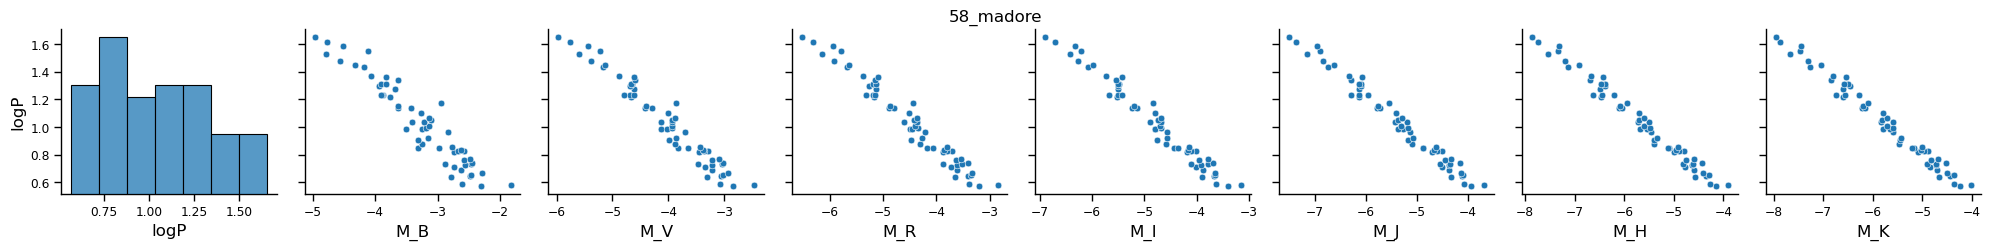

In [4]:
from lvtlaw.b_data_transform import plot_corr

raw, absolute, extinction, tabsolute, wesenheit, merged_data = transformation_()  #0

plot_corr(raw.drop(columns=['name', 'EBV']+dis_list) , Y = 'logP', title = file_name, f=12)

# Period Luminosity relations 

* * c_pl_pw module loaded!
./data/58_madore_3.23/9_plots/2_PLPW/58_0BVRIJHK_h.pdf


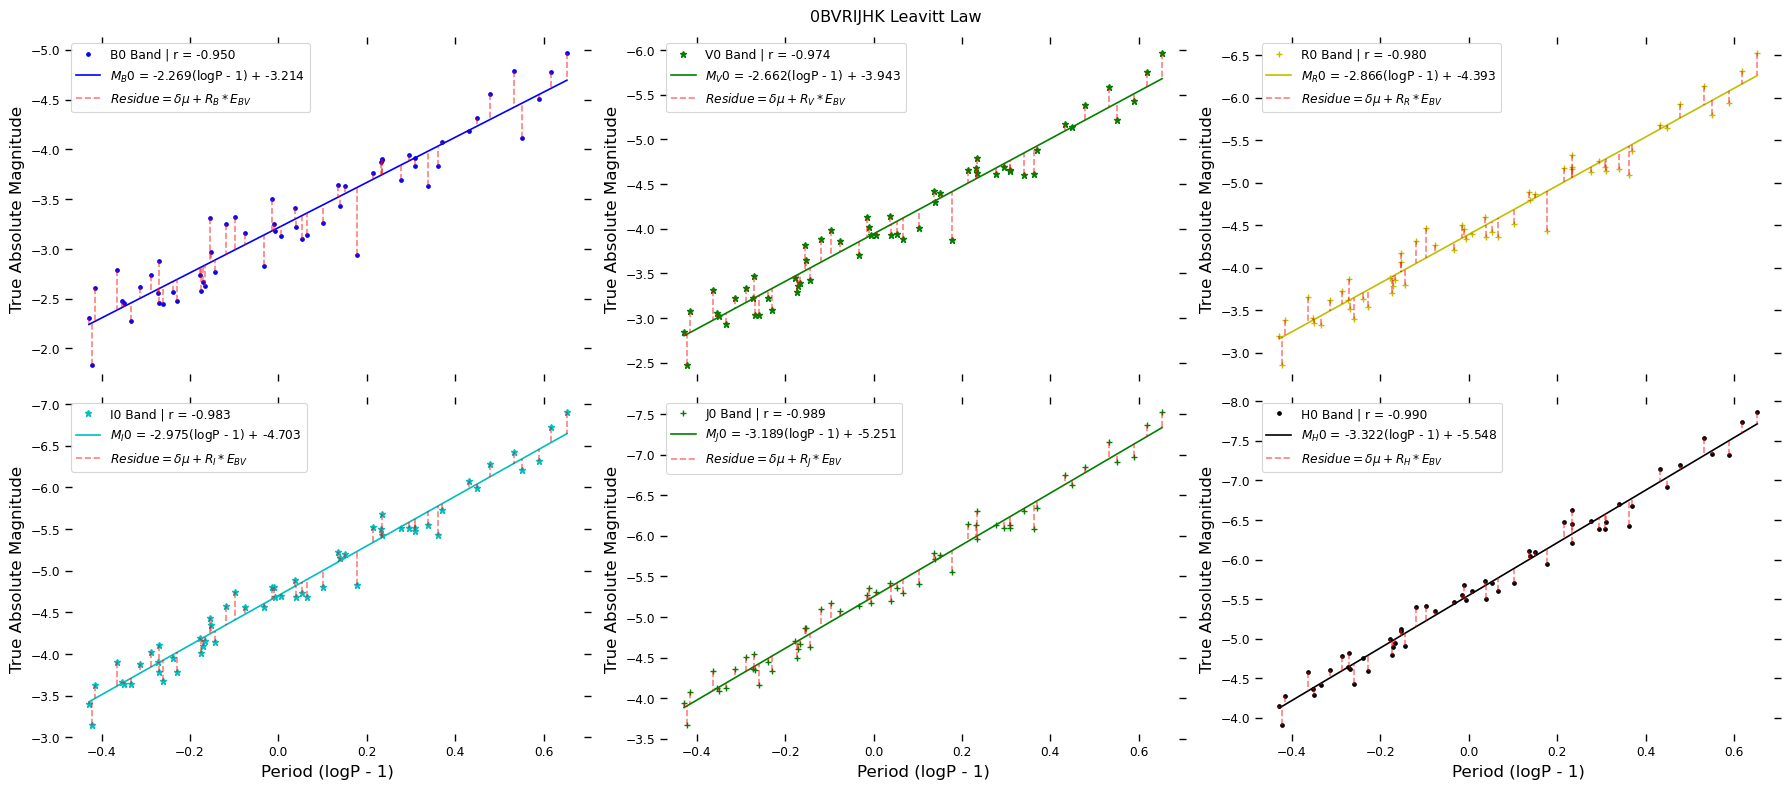

./data/58_madore_3.23/9_plots/2_PLPW/58_0BVRIJHK__h_residuals.pdf


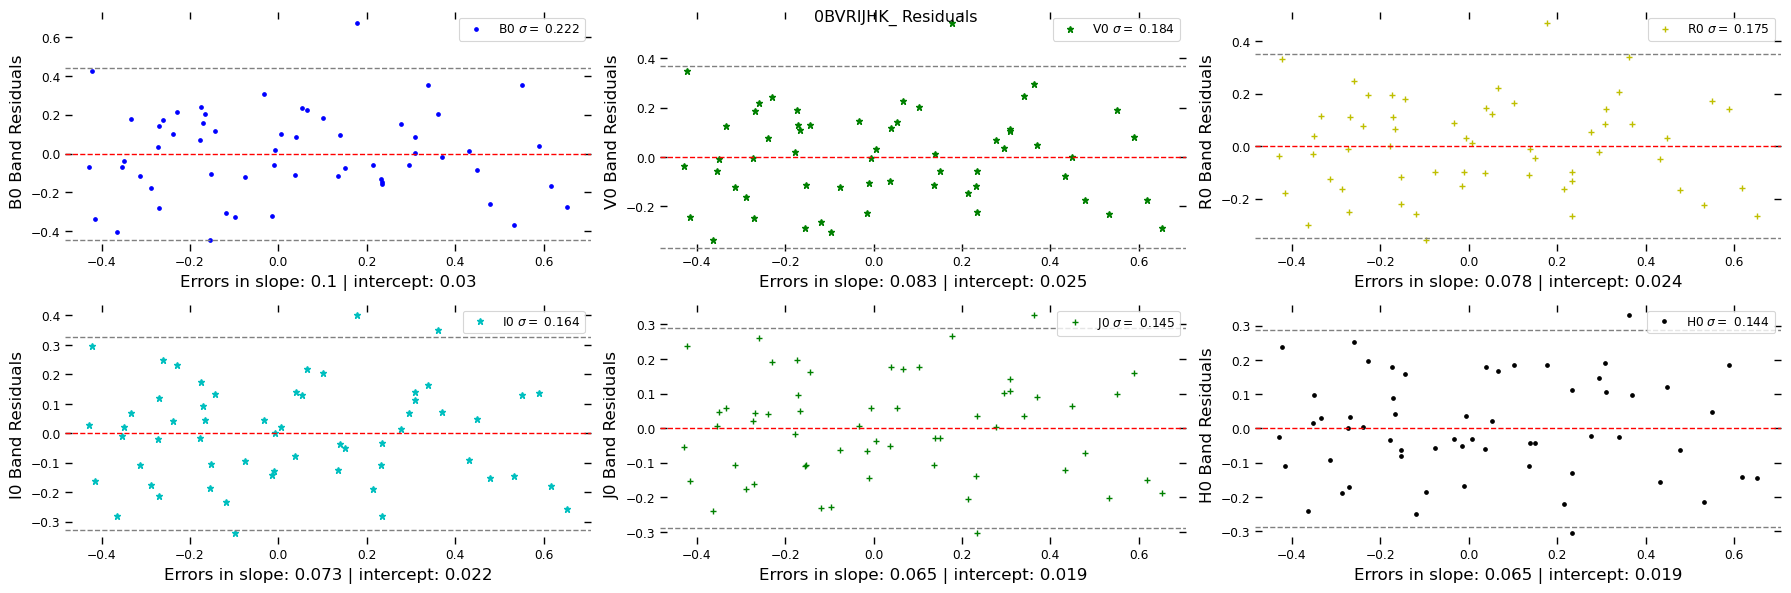

In [3]:
from lvtlaw.c_pl_pw import plotPL6, plotPW6, plotPLWres

PLWregression, PLWresidue, PLWprediction, merged_data=PLWcorrection_() # 1
#plotPL6(merged_data, PLWregression, ab = '')
plotPL6(merged_data, PLWregression, ab = '0')

# Period Wesenheit Relation

Wesenheit  VI
./data/58_madore_3.23/9_plots/2_PLPW/58_VI_BVRIJHK_h.pdf


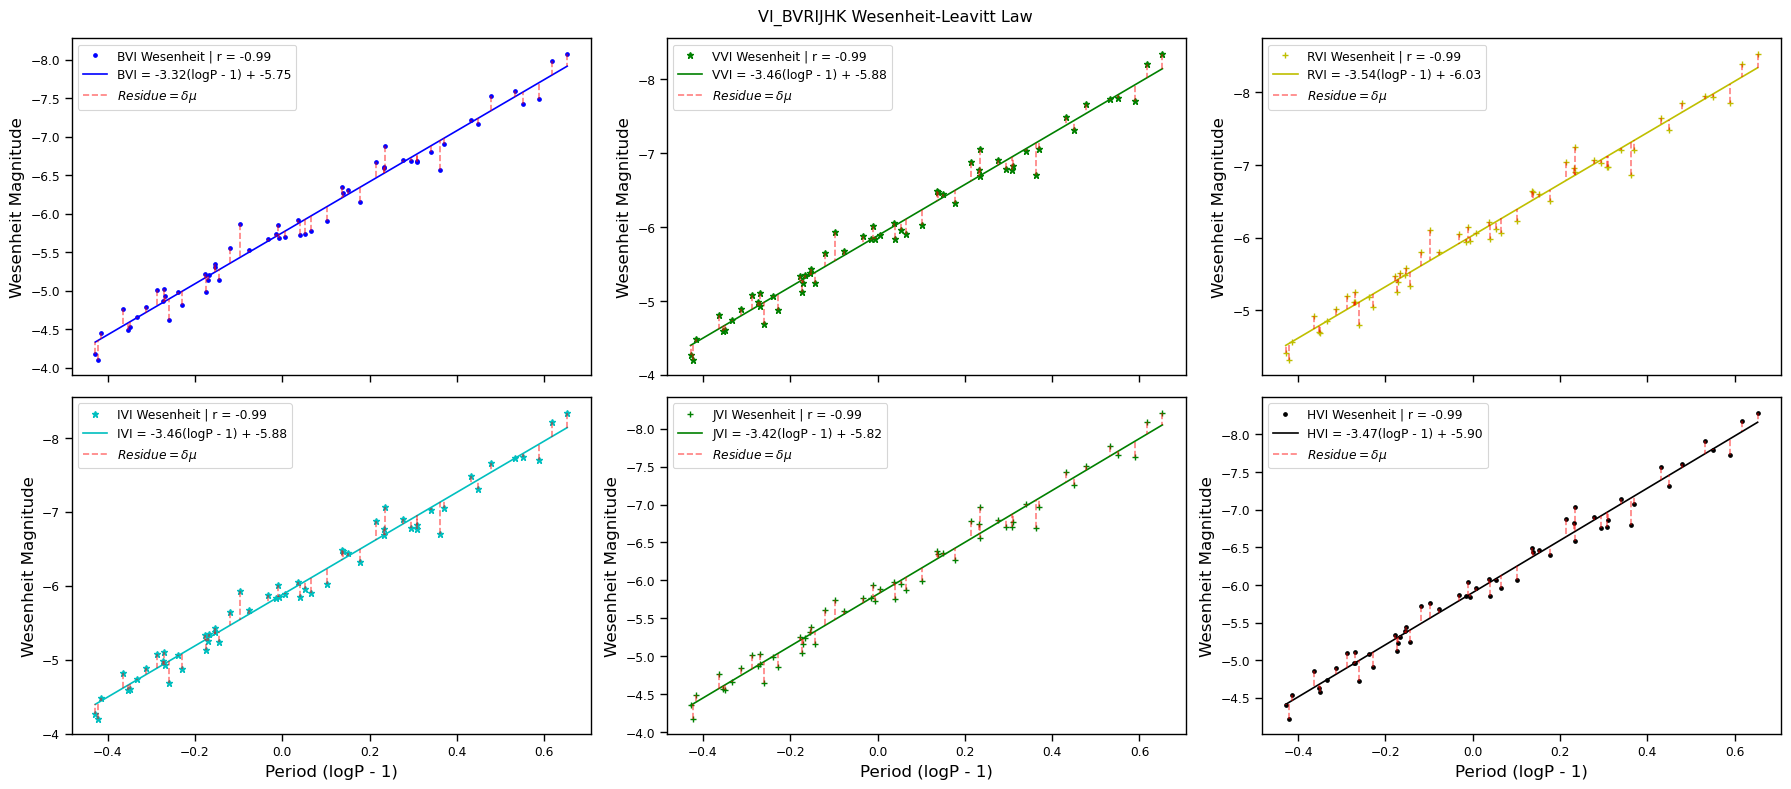

./data/58_madore_3.23/9_plots/2_PLPW/58_BVRIJHK_VI_h_residuals.pdf


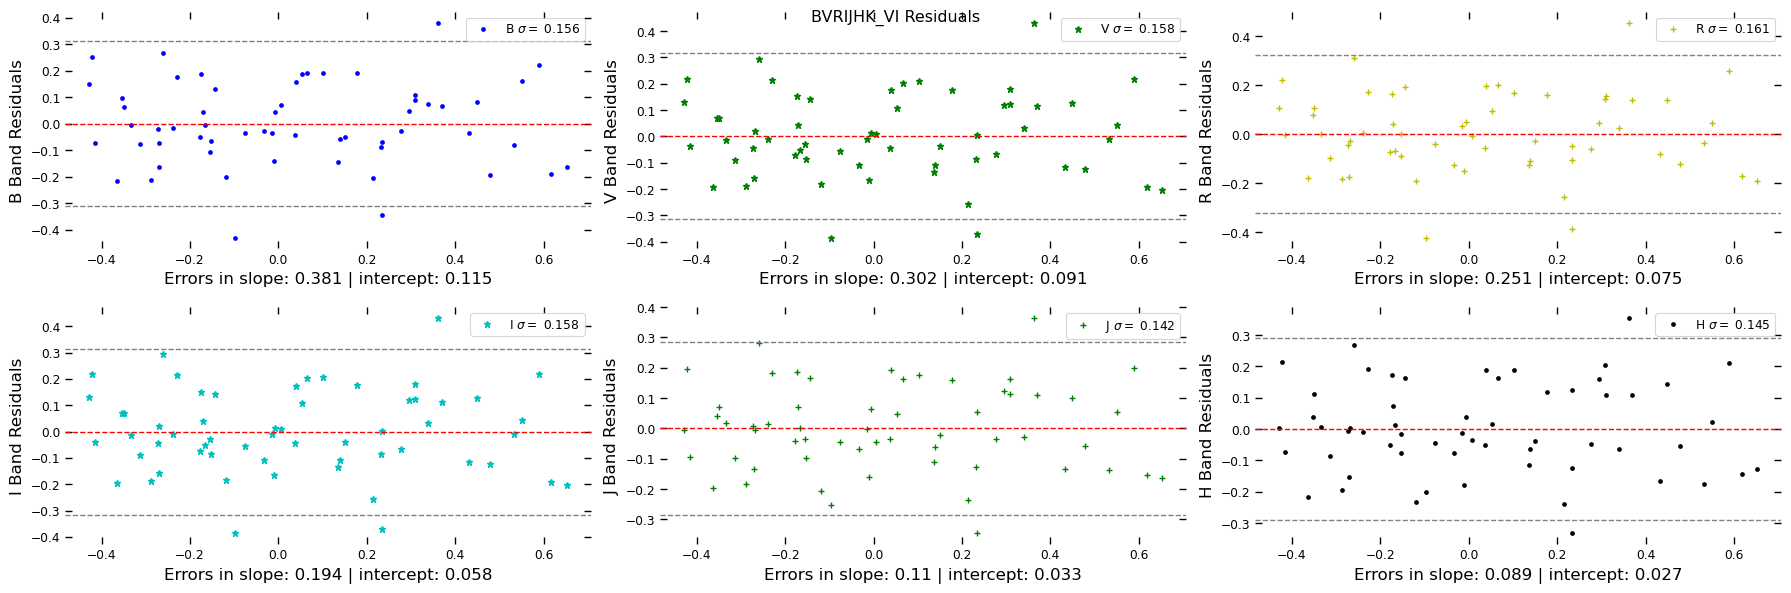

Wesenheit  HK
./data/58_madore_3.23/9_plots/2_PLPW/58_HK_BVRIJHK_h.pdf


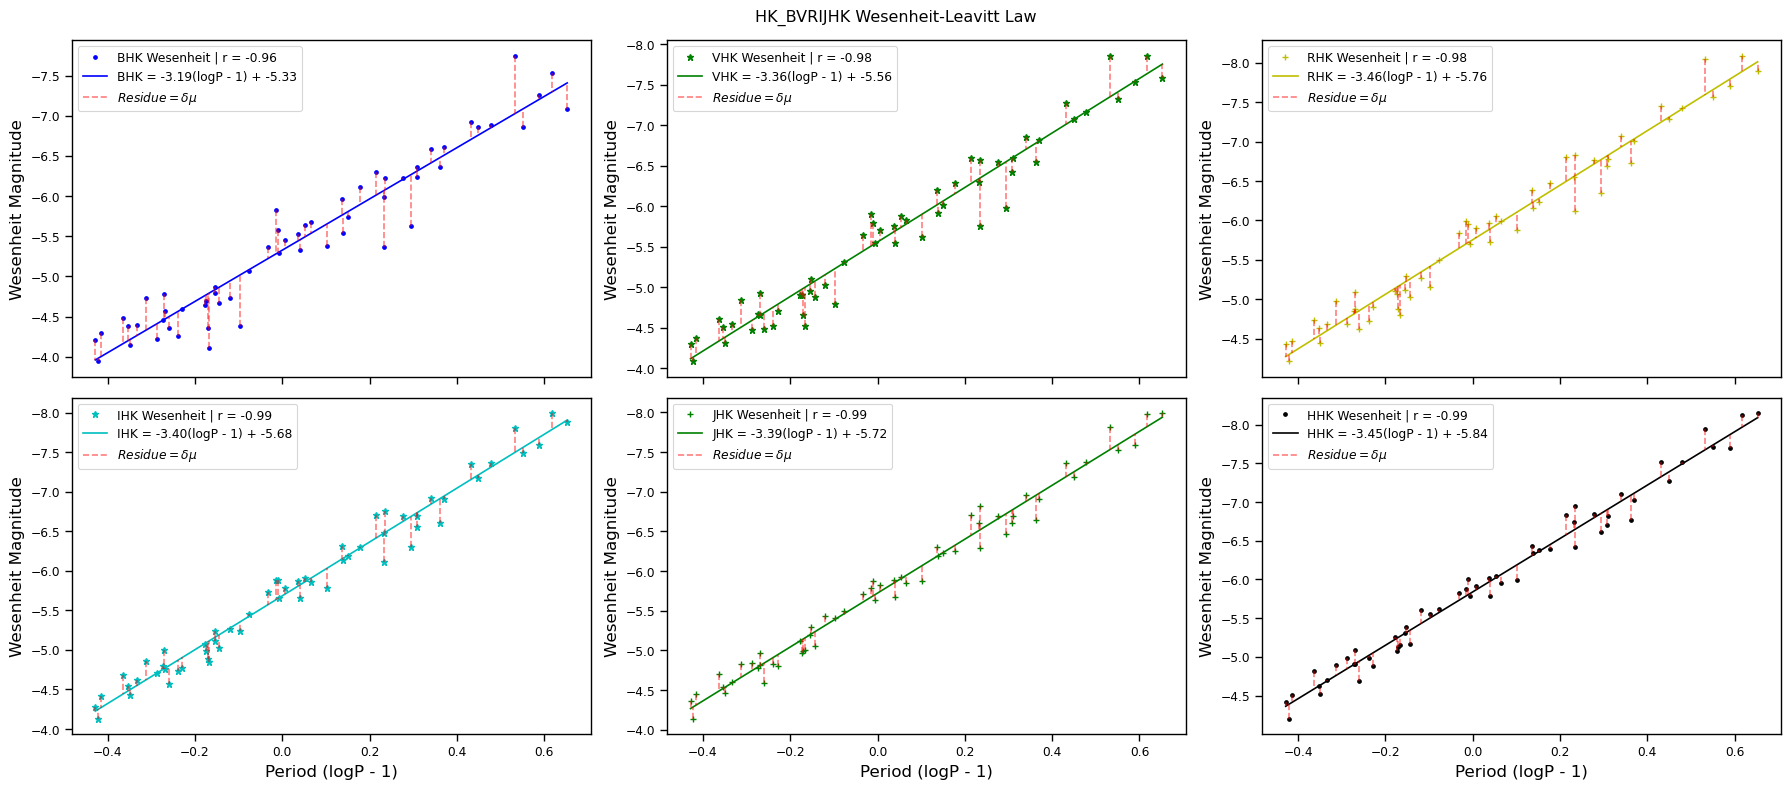

./data/58_madore_3.23/9_plots/2_PLPW/58_BVRIJHK_HK_h_residuals.pdf


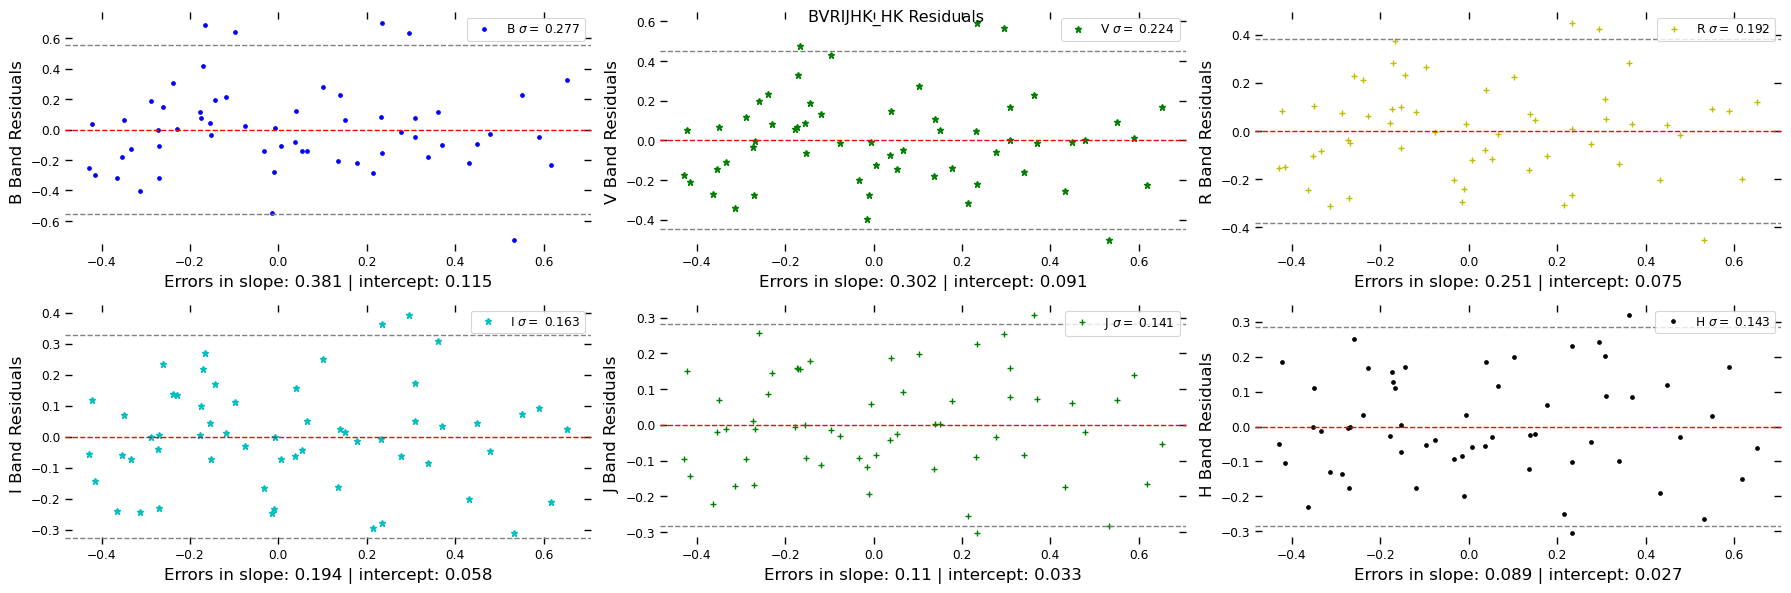

Wesenheit  IJ
./data/58_madore_3.23/9_plots/2_PLPW/58_IJ_BVRIJHK_h.pdf


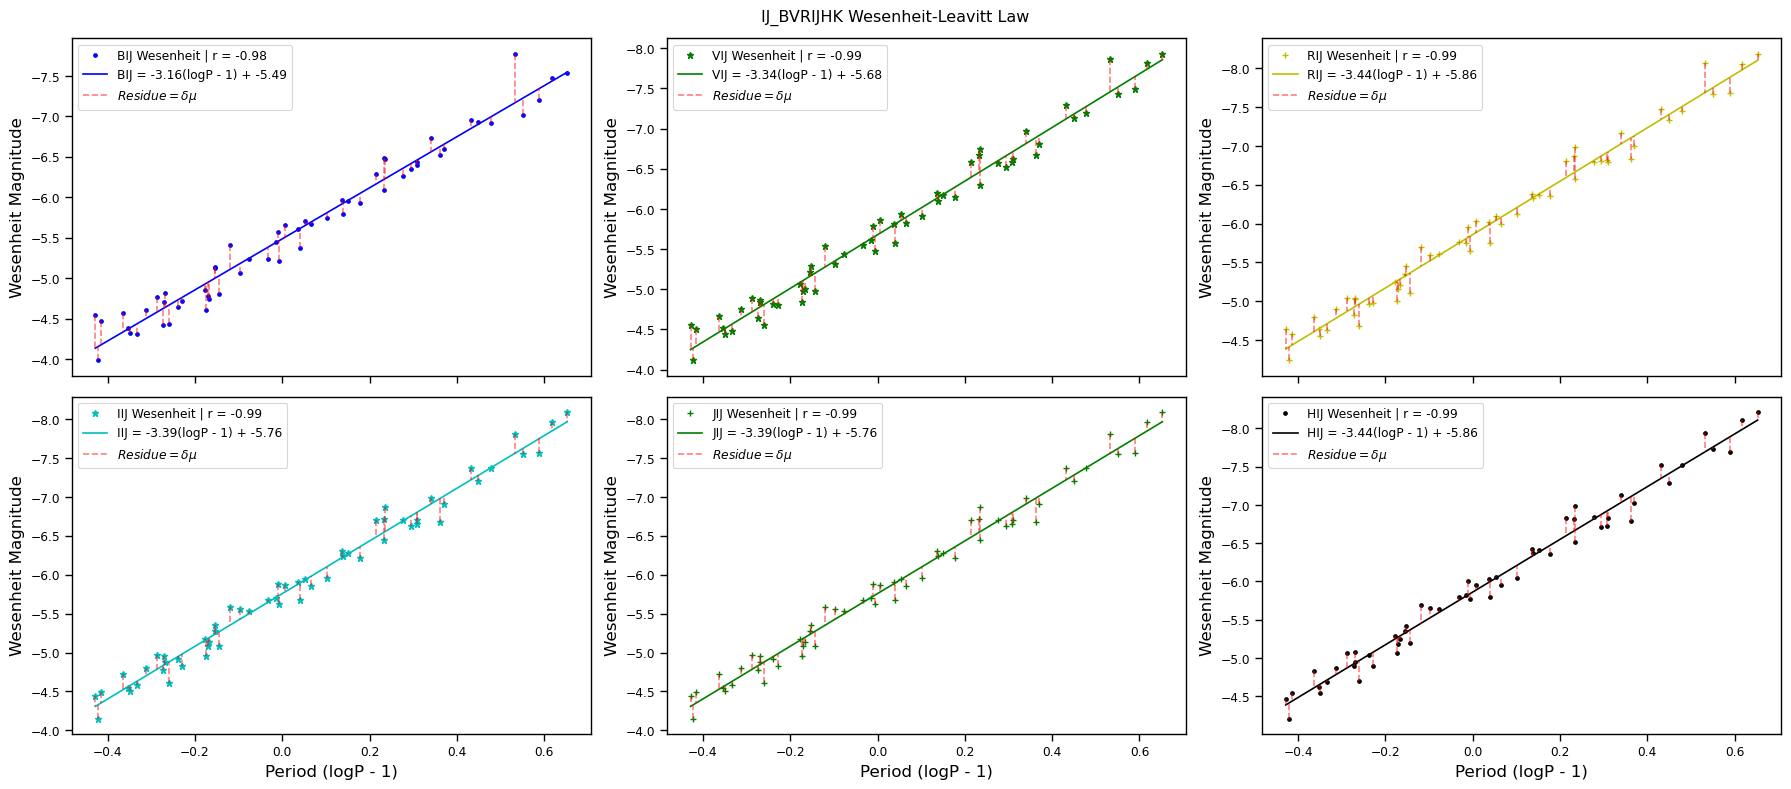

./data/58_madore_3.23/9_plots/2_PLPW/58_BVRIJHK_IJ_h_residuals.pdf


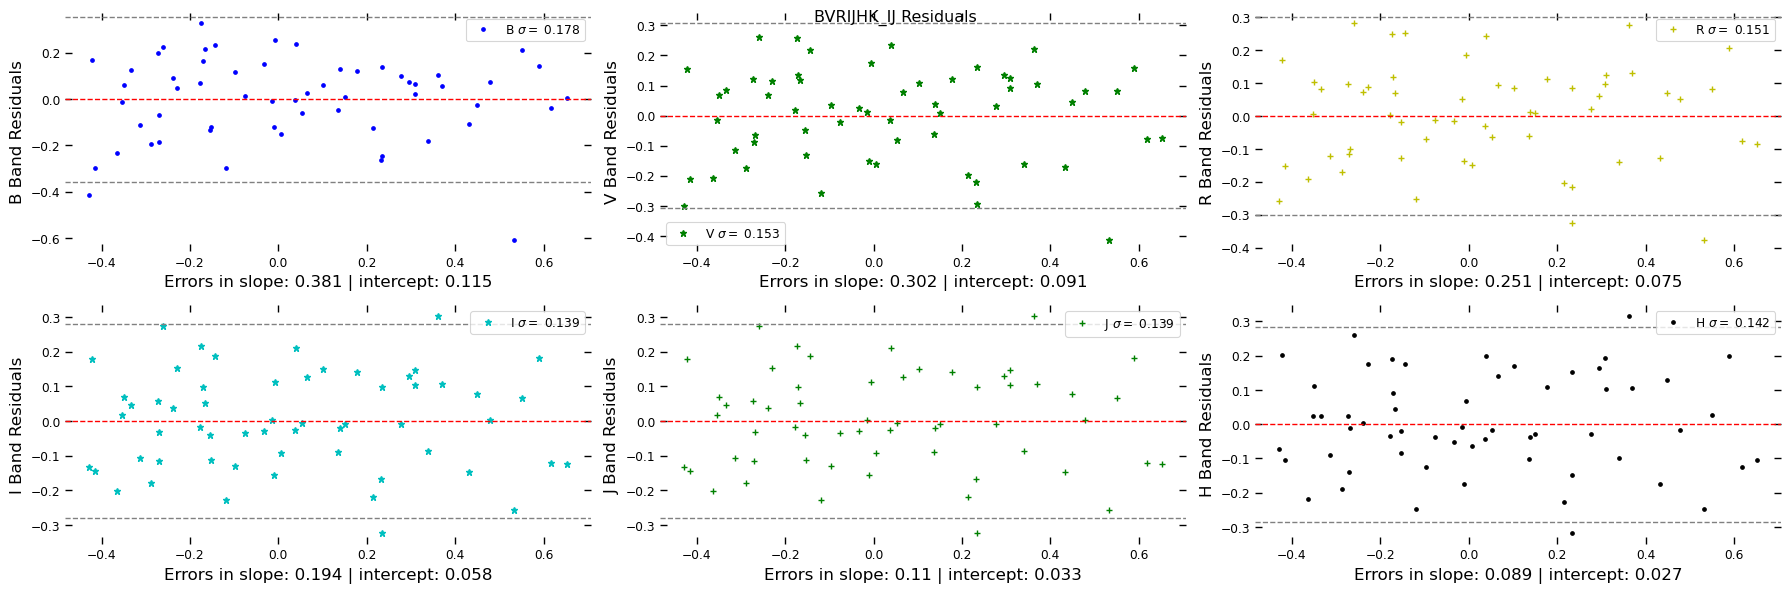

Wesenheit  JH
./data/58_madore_3.23/9_plots/2_PLPW/58_JH_BVRIJHK_h.pdf


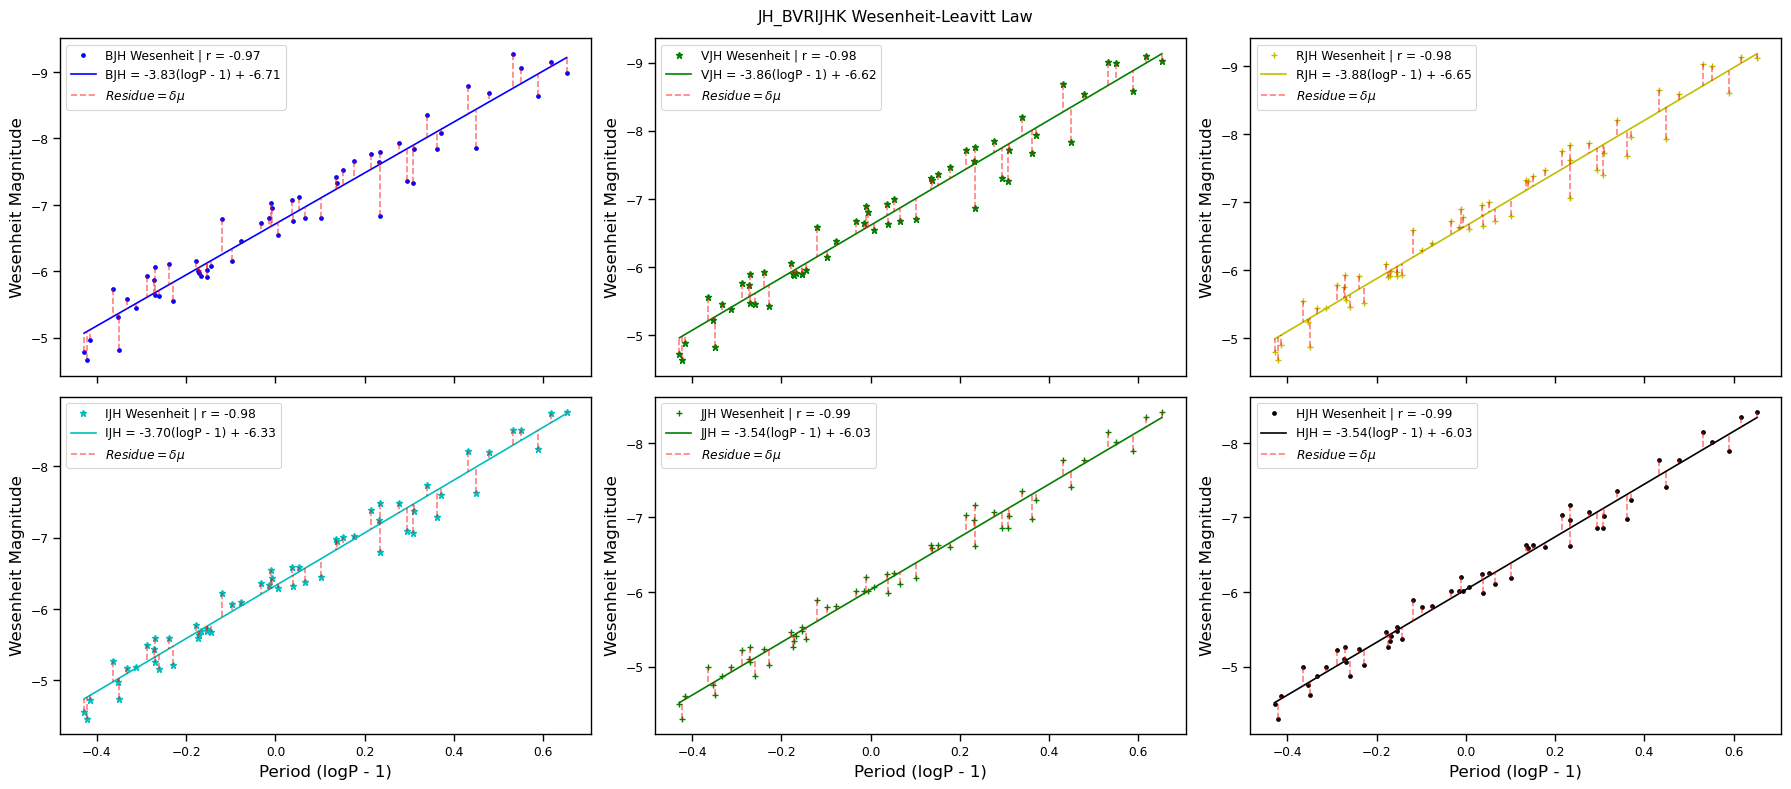

./data/58_madore_3.23/9_plots/2_PLPW/58_BVRIJHK_JH_h_residuals.pdf


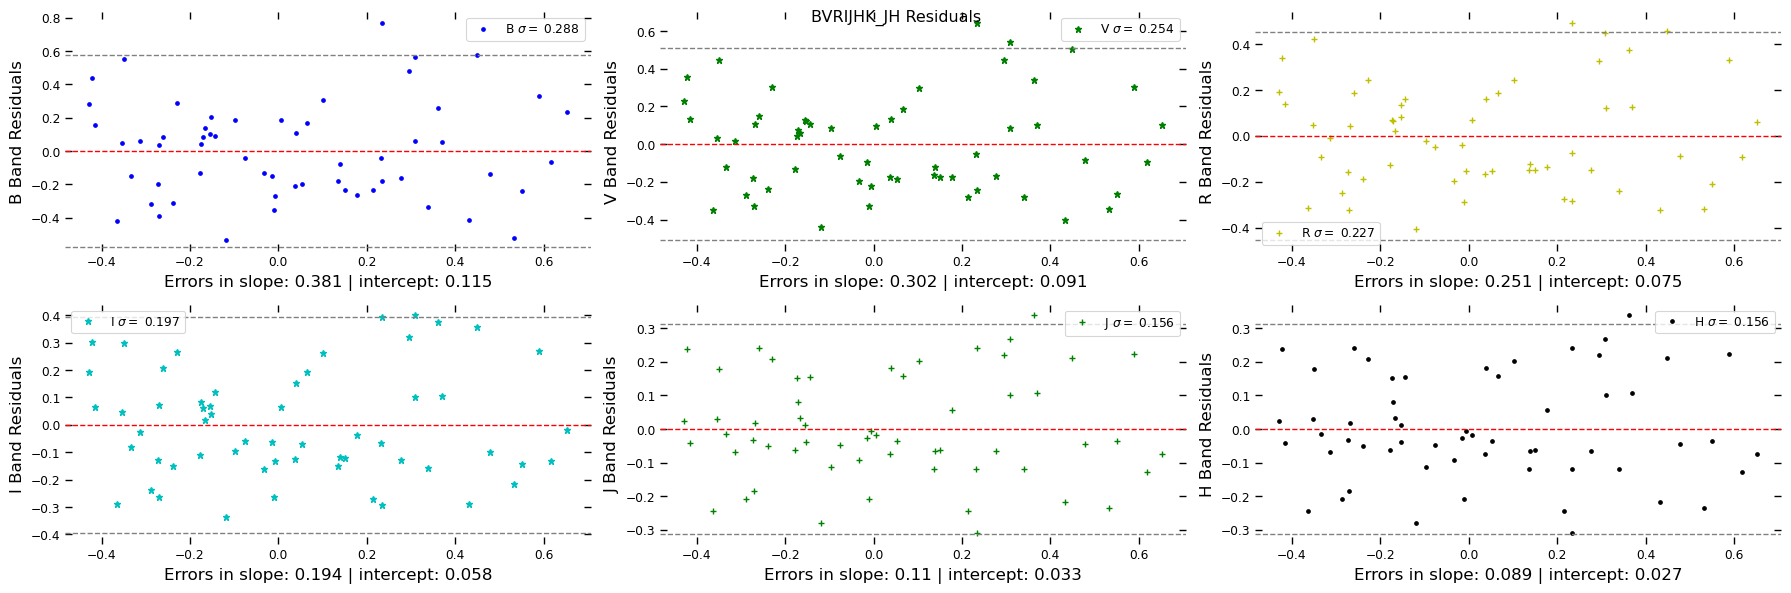

[None, None, None, None]

In [4]:
[plotPW6(merged_data, PLWregression, col) for col in wes_show]

# Residue - Residue Plot

In [8]:
merged_data.head().style

* * d_del_del module loaded!
For Wesenheit:
VI
./data/58_madore_3.23/9_plots/3_deldel/58_deldel_S_0VI_h.pdf


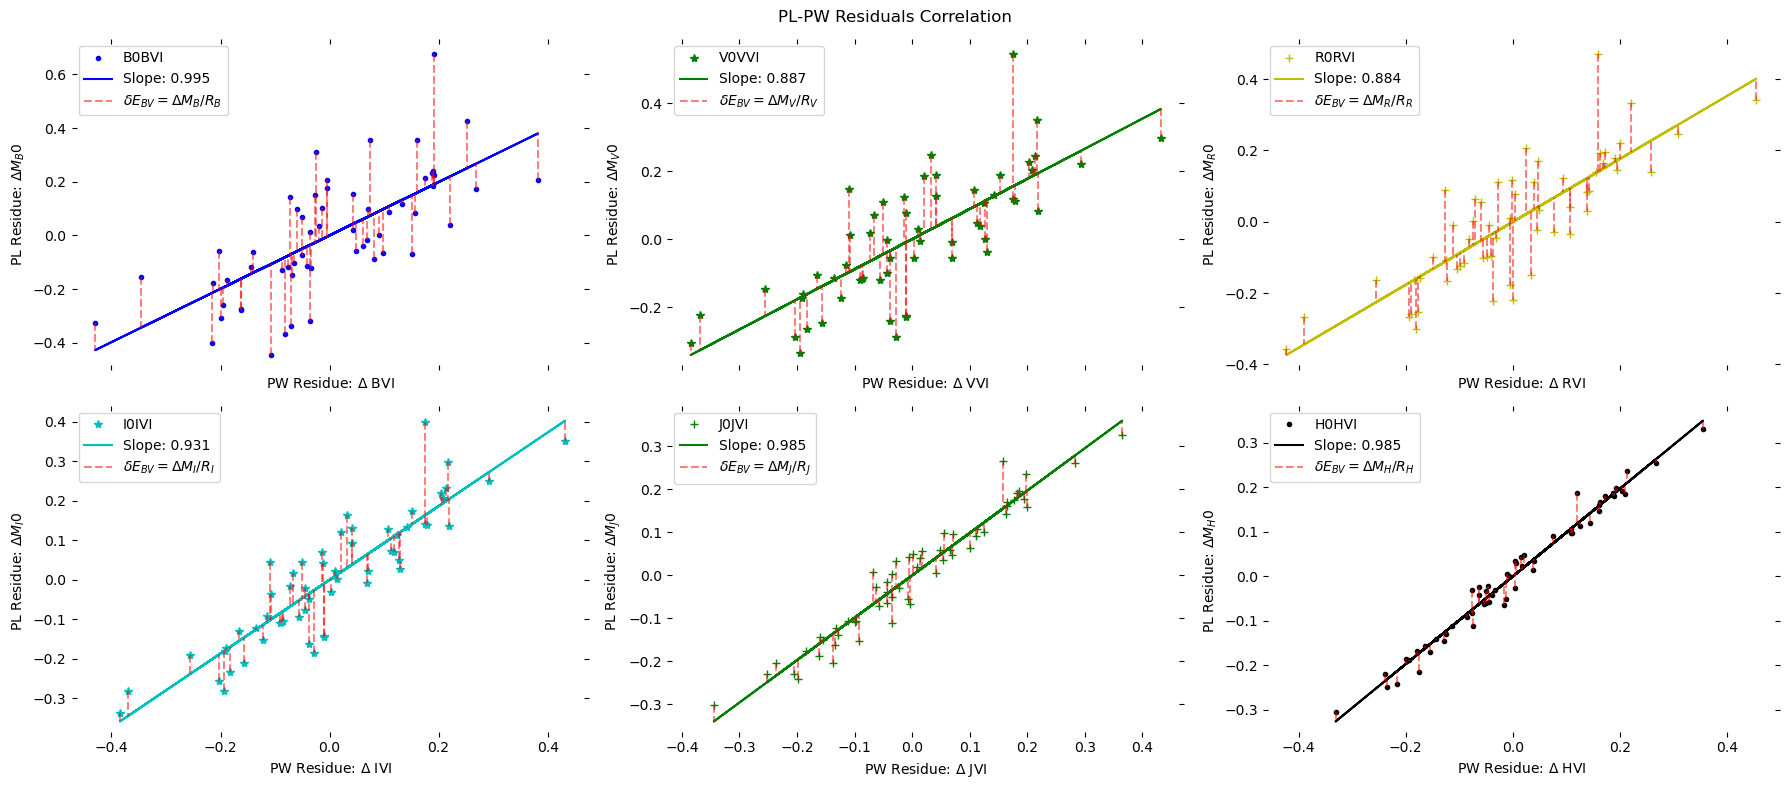

./data/58_madore_3.23/9_plots/3_deldel/58_S_0VI_h_residuals.png


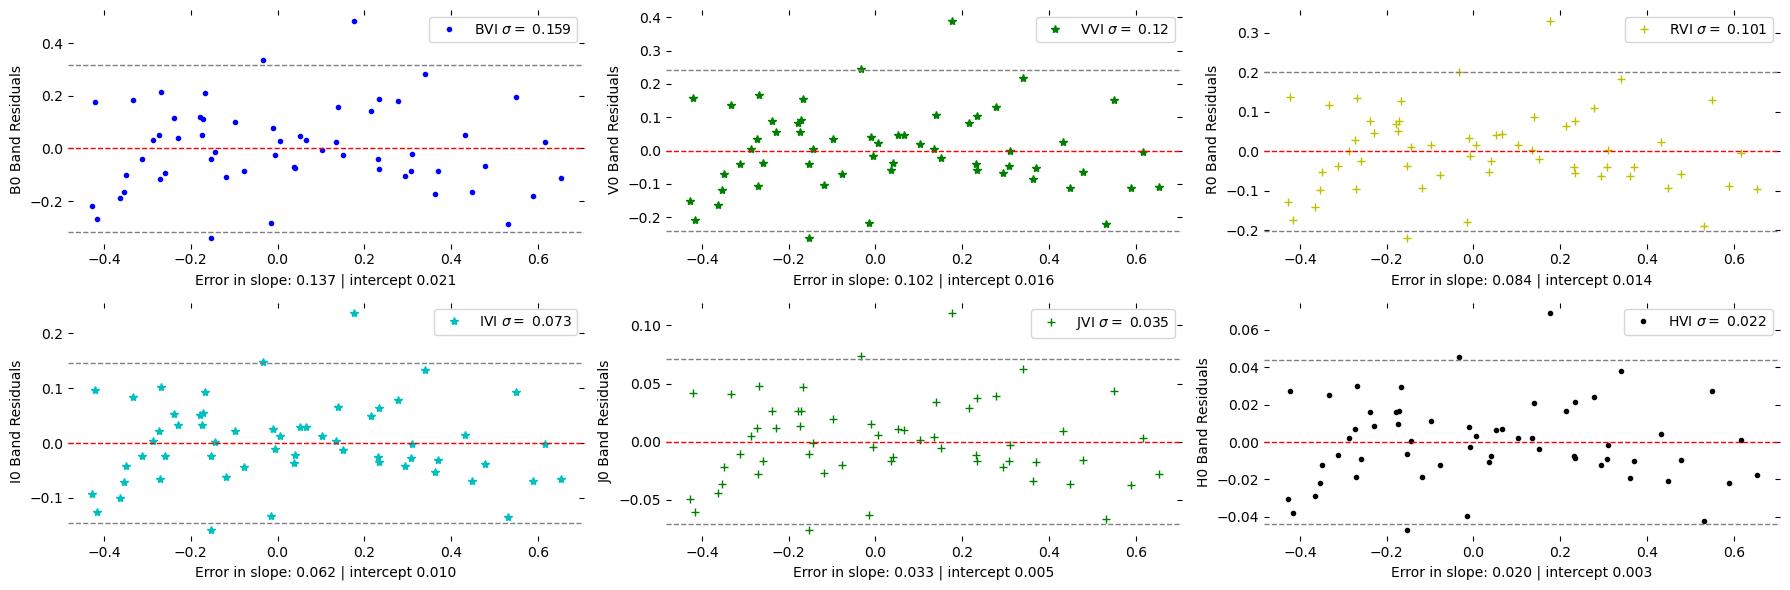

HK
./data/58_madore_3.23/9_plots/3_deldel/58_deldel_S_0HK_h.pdf


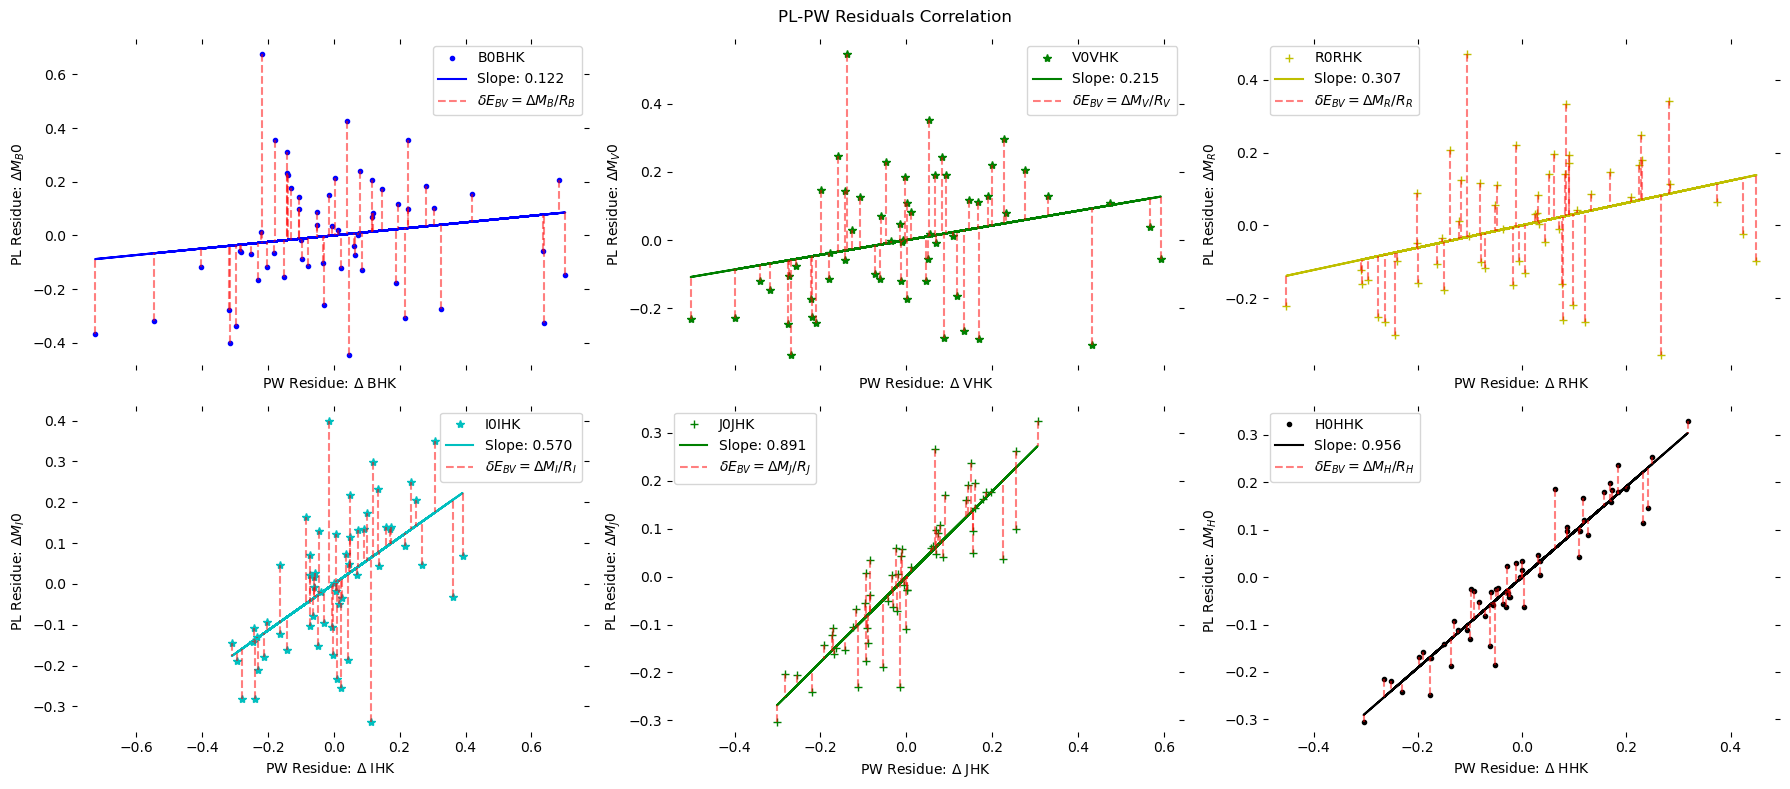

./data/58_madore_3.23/9_plots/3_deldel/58_S_0HK_h_residuals.png


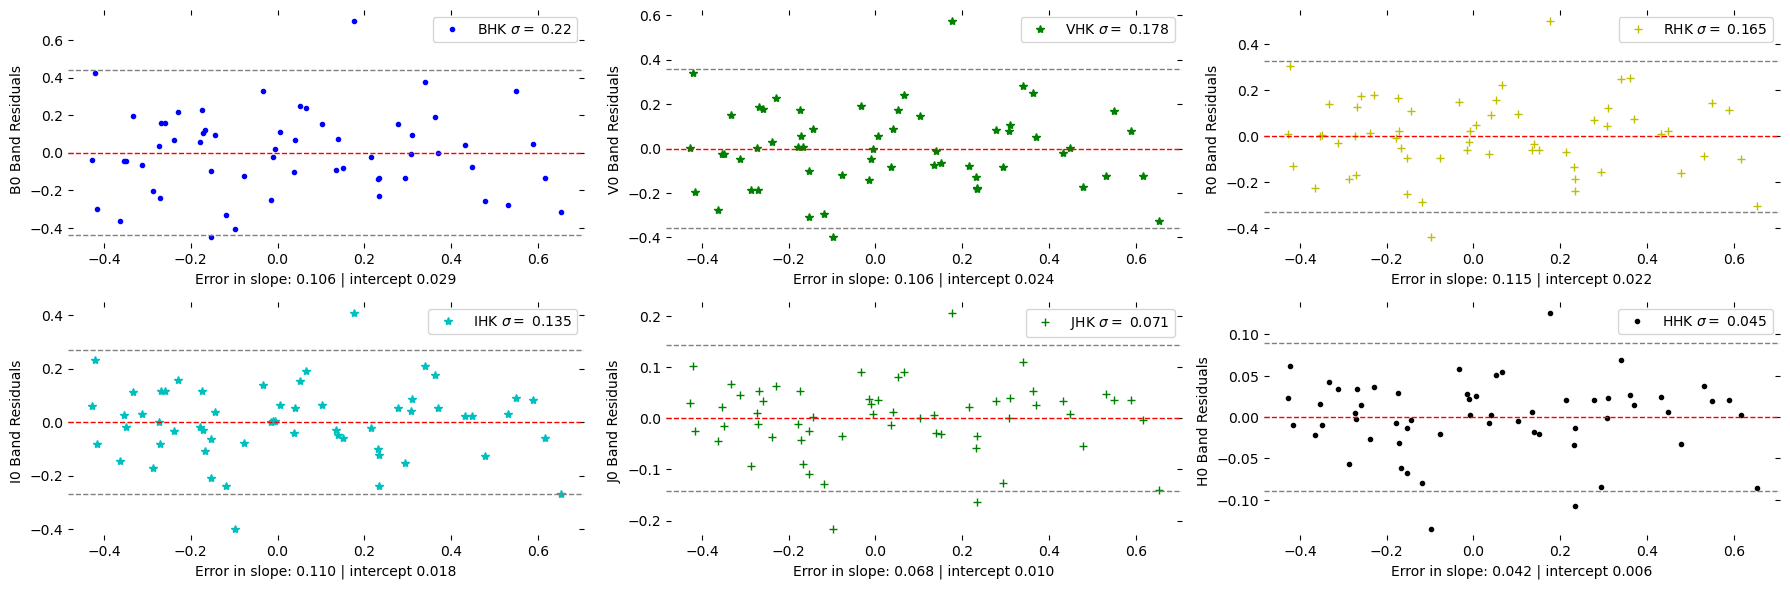

IJ
./data/58_madore_3.23/9_plots/3_deldel/58_deldel_S_0IJ_h.pdf


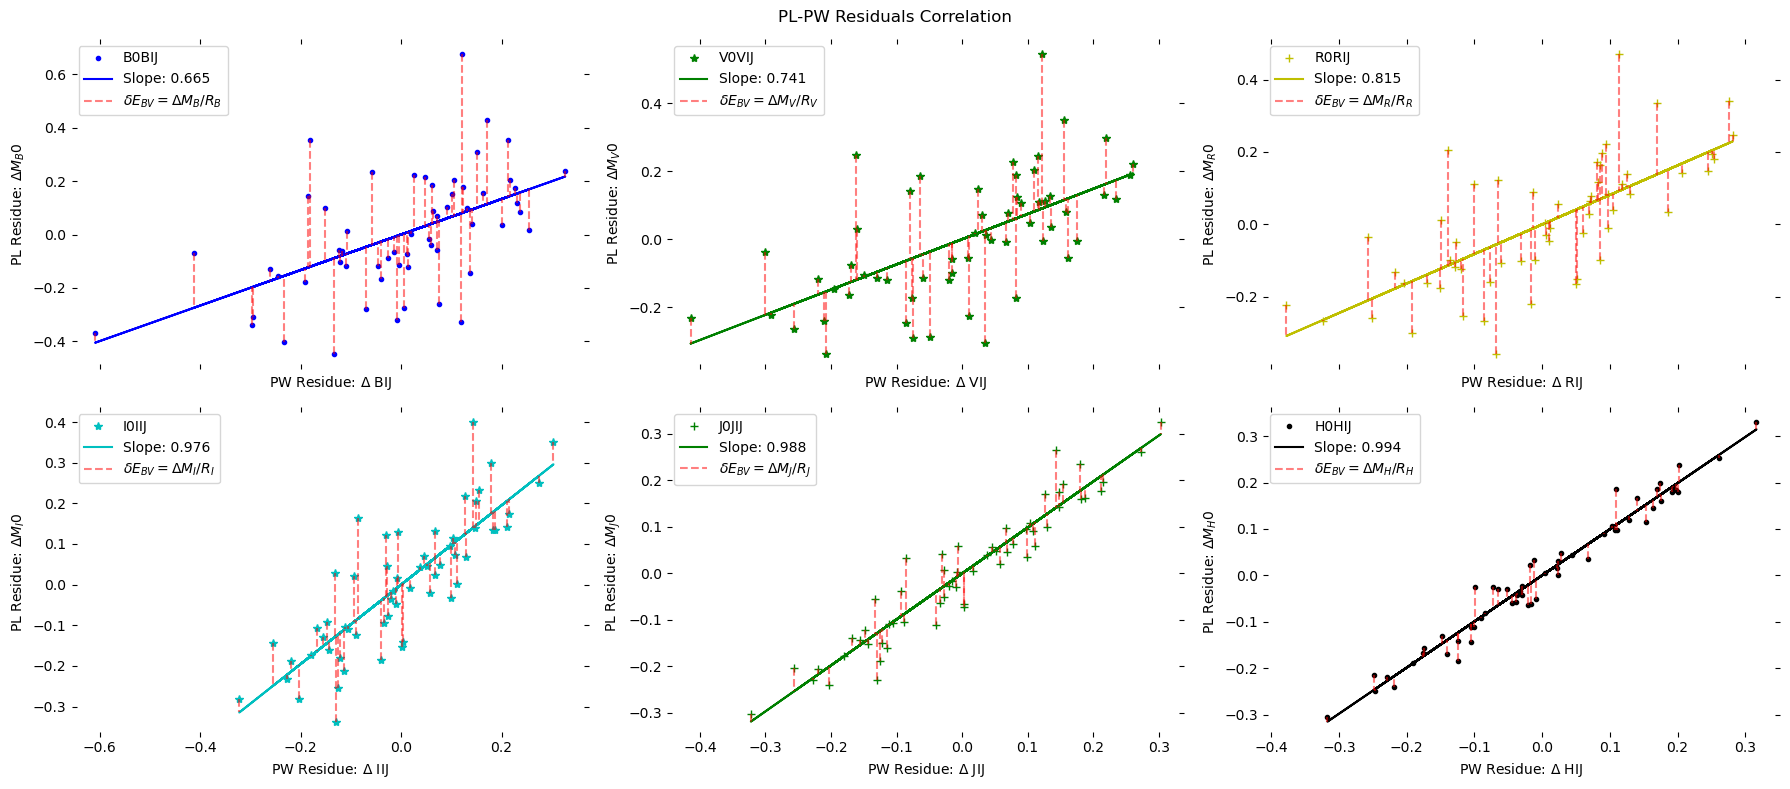

./data/58_madore_3.23/9_plots/3_deldel/58_S_0IJ_h_residuals.png


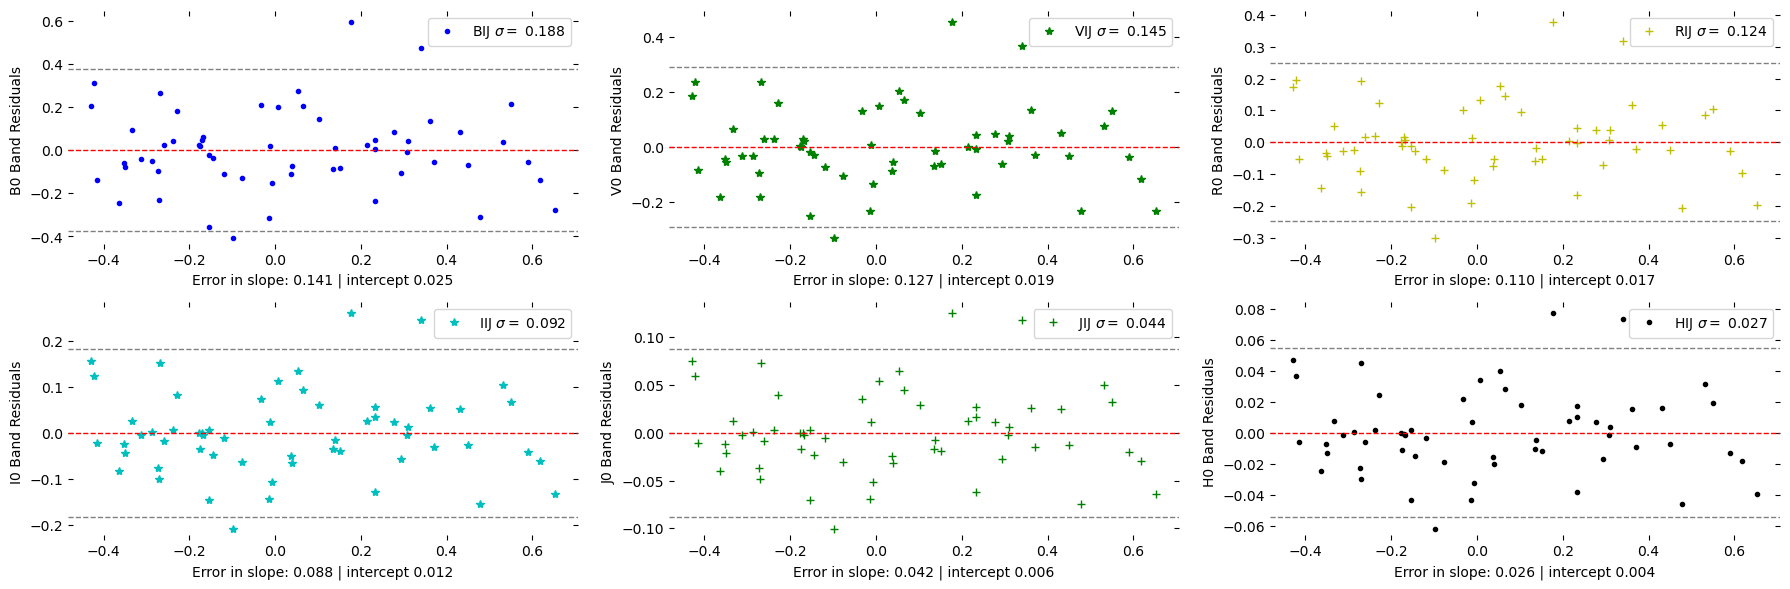

JH
./data/58_madore_3.23/9_plots/3_deldel/58_deldel_S_0JH_h.pdf


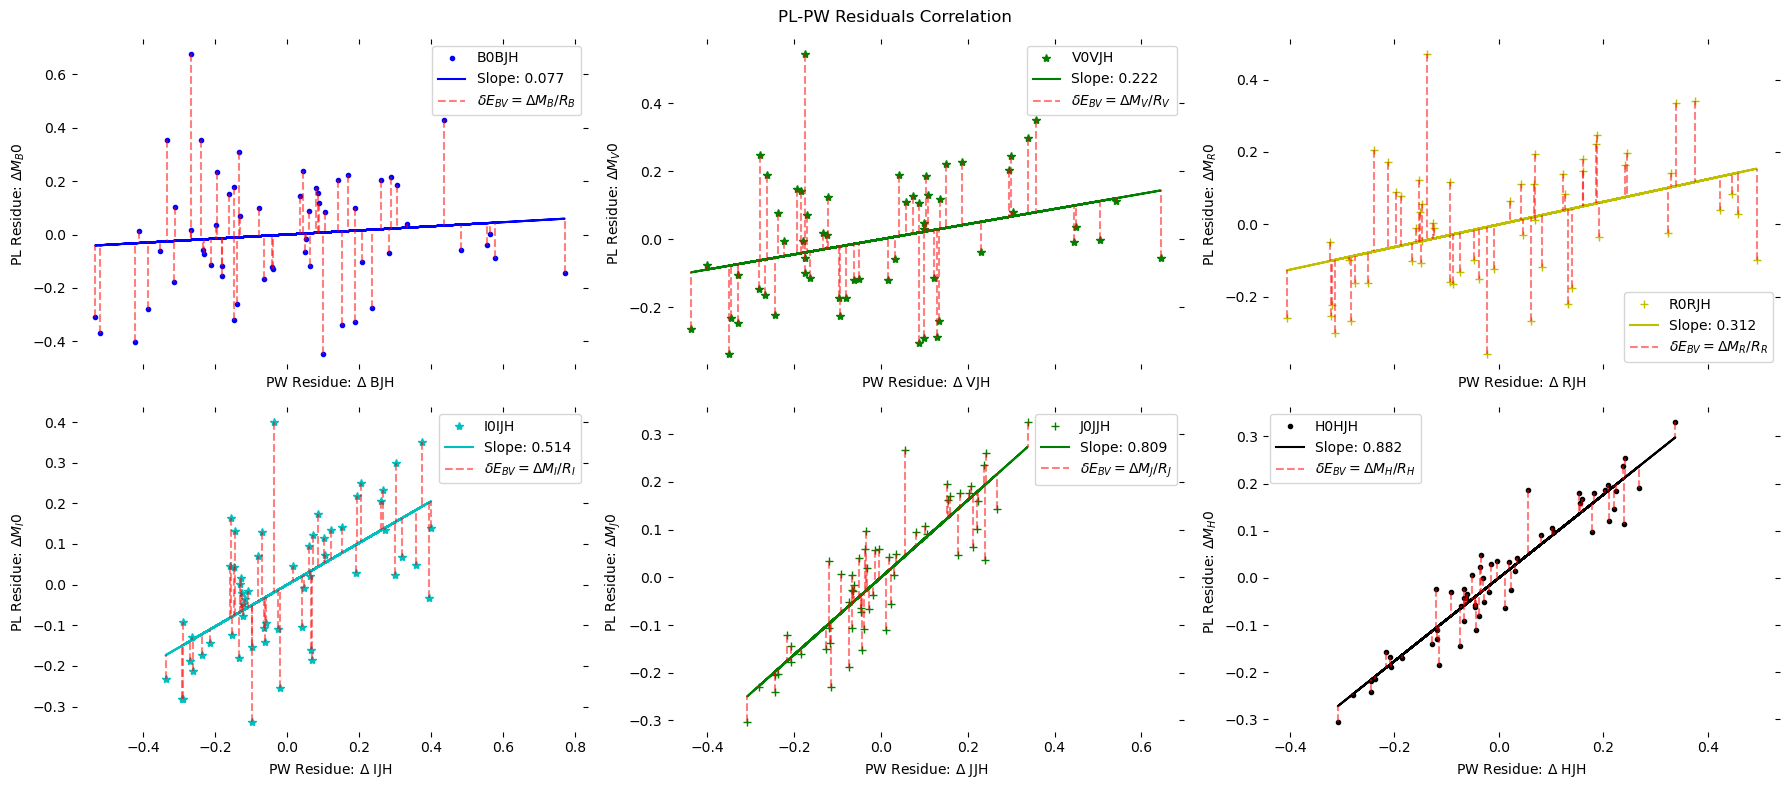

./data/58_madore_3.23/9_plots/3_deldel/58_S_0JH_h_residuals.png


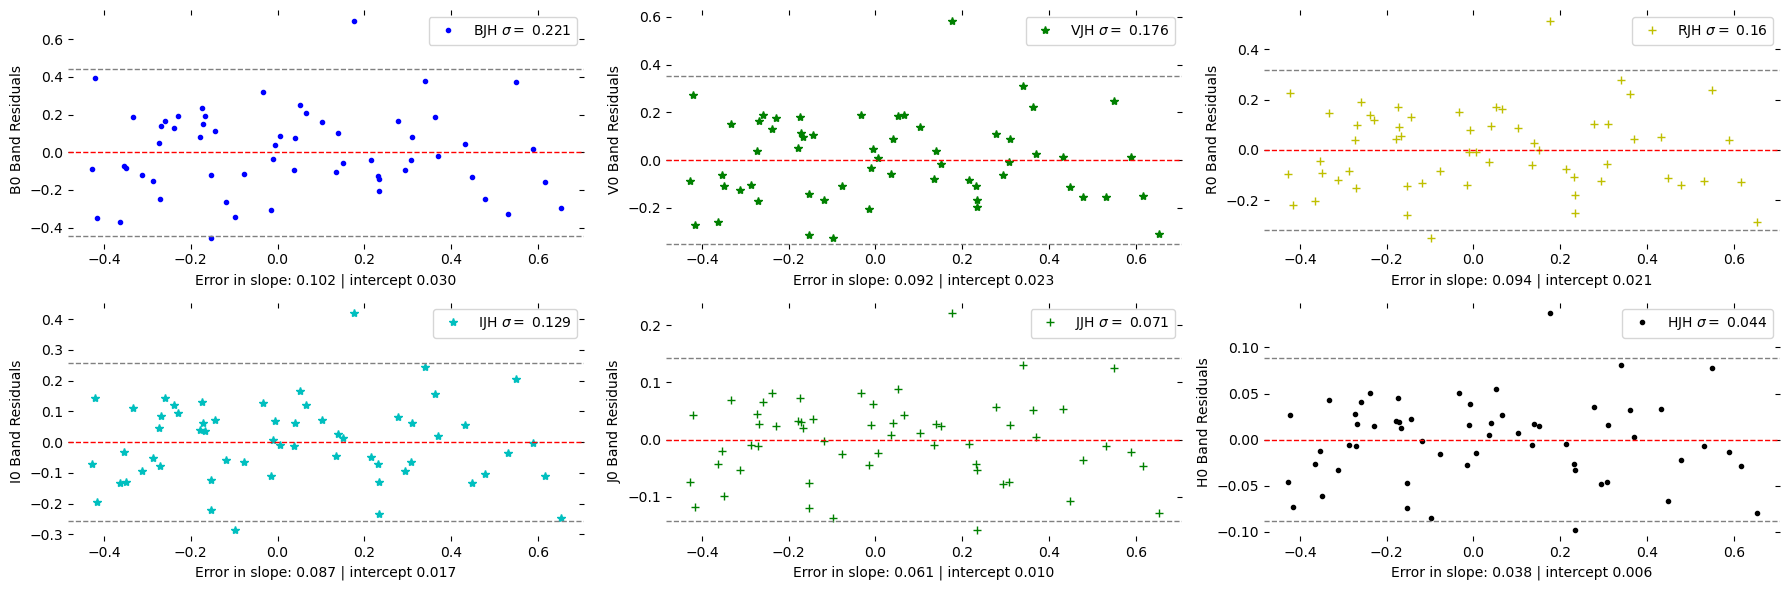

[None, None, None, None]

In [2]:
from lvtlaw.d_del_del import plotdeldel6
dmc, dpre, dres, merged_data = residual_correlation_() #2
print(f'For Wesenheit:')
[plotdeldel6(merged_data, dmc, col, dis, 'S', '0', s) for col in wes_show]

* * datamapping module loaded!
* * a_utils module loaded!
* * datamapping module loaded!
* * b_data_transform module loaded!
* * c_pl_pw module loaded!
* * e_error_estimation module loaded!


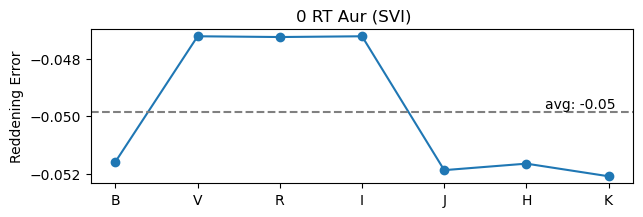

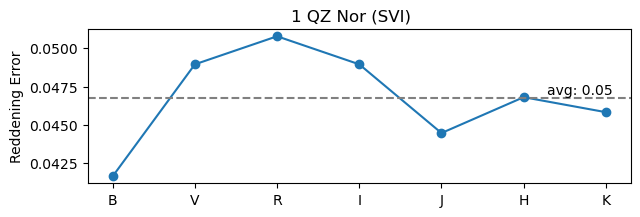

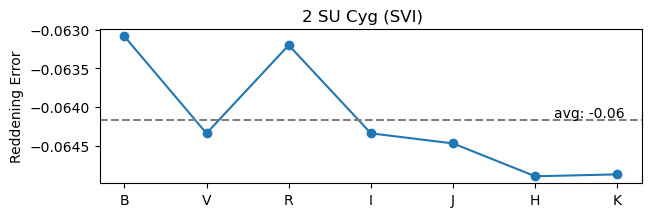

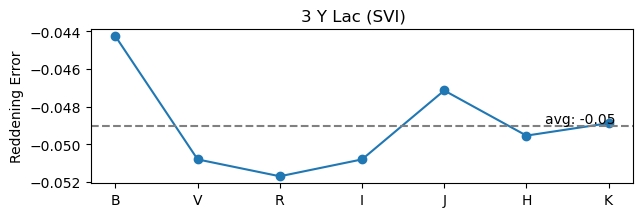

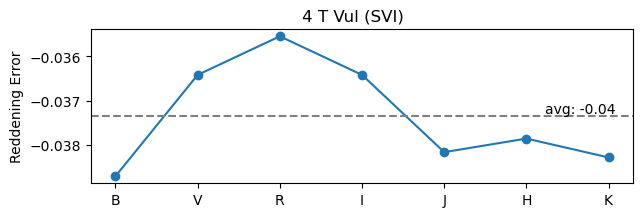

In [1]:
from lvtlaw.h_loadoutput import *
from lvtlaw.e_error_estimation import plot_star_rd0
ext0, red0, mu_df_list_dict, data = rd_mu_error_matrix_()    
for i in range(5):
    plot_star_rd0(i, red0, 'VI', 'S', '0')

# Decoupling Distance Reddening Systematic Errors

58_7_star_SVI_h
./data/58_madore_3.23/9_plots/6_rms/58_7_star_SVI_h.pdf


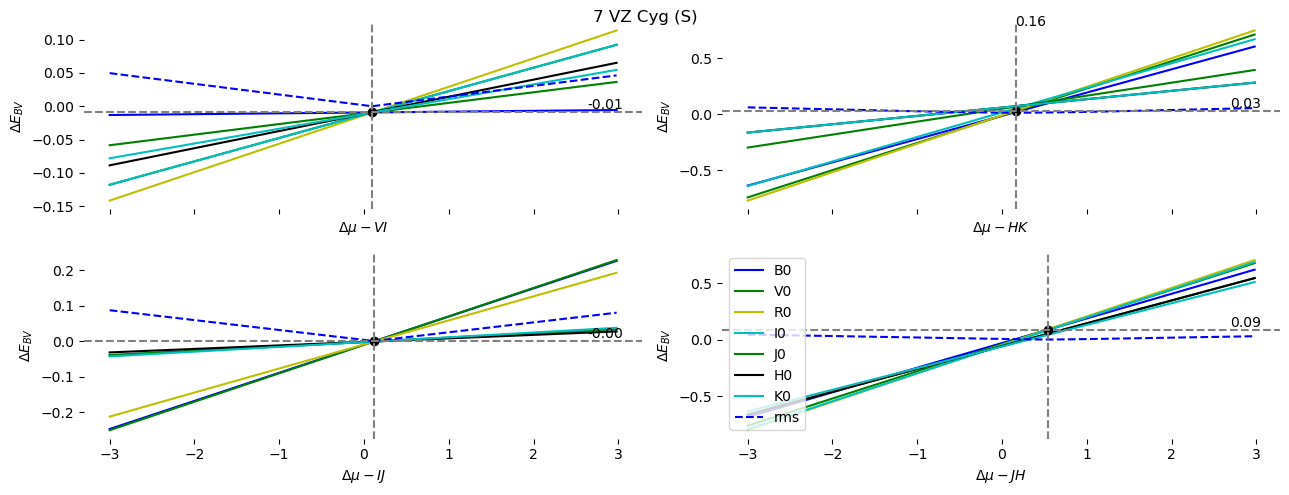

58_8_star_SVI_h
./data/58_madore_3.23/9_plots/6_rms/58_8_star_SVI_h.pdf


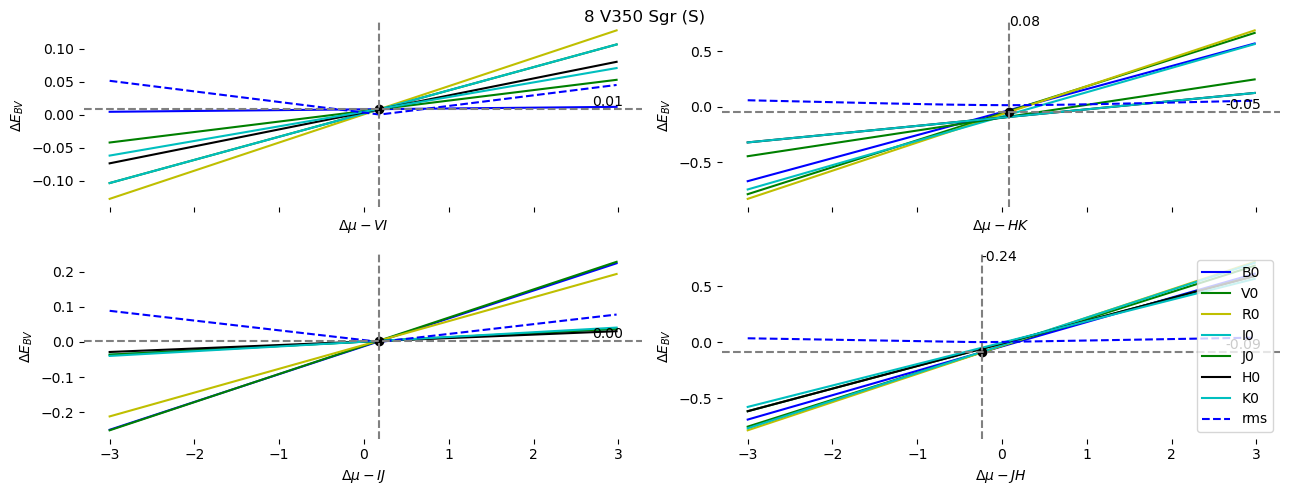

58_9_star_SVI_h
./data/58_madore_3.23/9_plots/6_rms/58_9_star_SVI_h.pdf


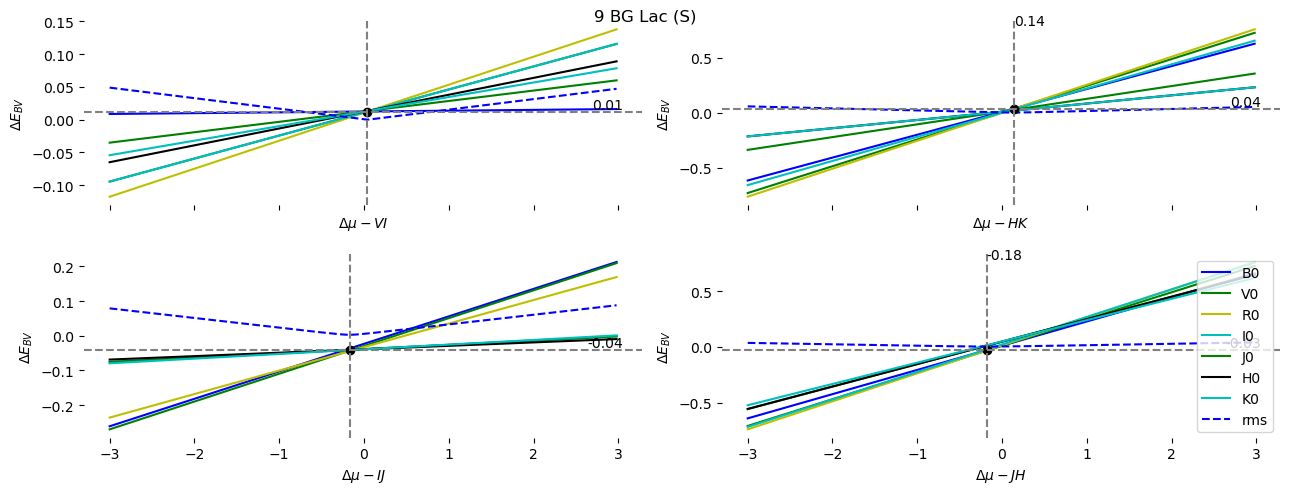

58_10_star_SVI_h
./data/58_madore_3.23/9_plots/6_rms/58_10_star_SVI_h.pdf


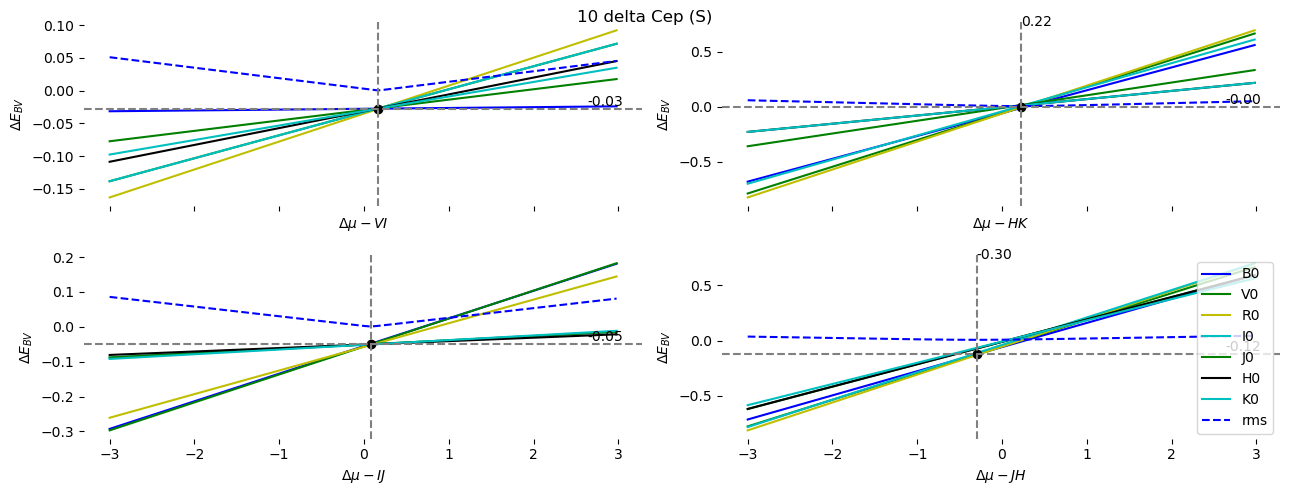

58_11_star_SVI_h
./data/58_madore_3.23/9_plots/6_rms/58_11_star_SVI_h.pdf


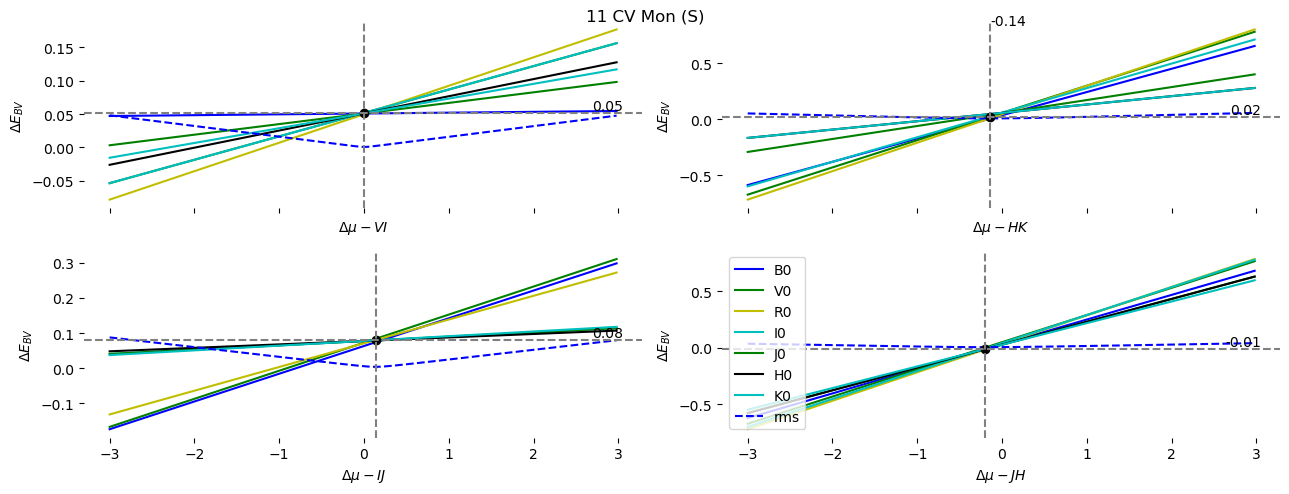

58_12_star_SVI_h
./data/58_madore_3.23/9_plots/6_rms/58_12_star_SVI_h.pdf


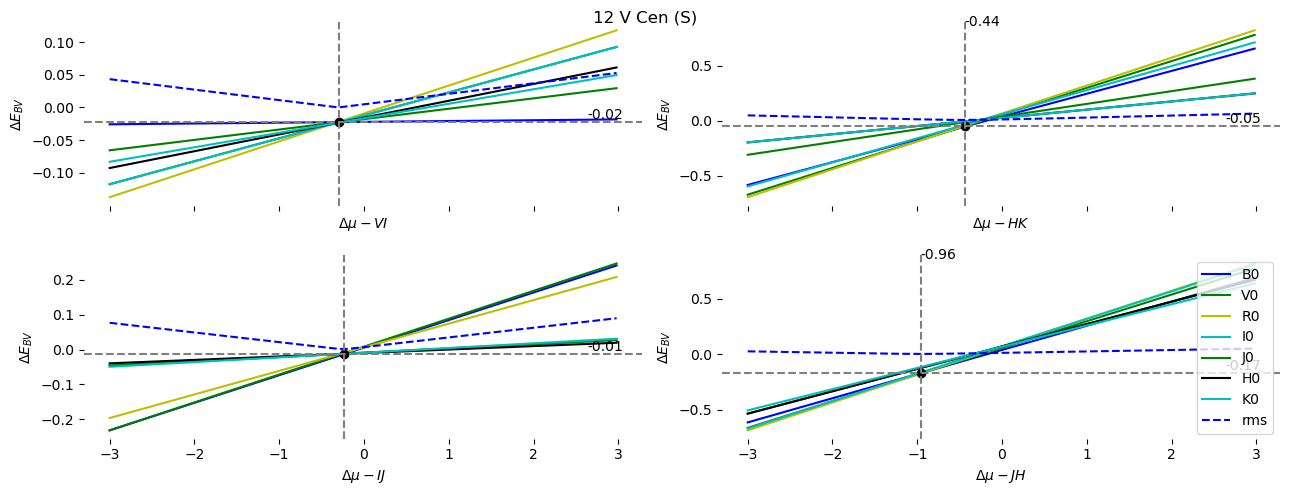

In [3]:
from lvtlaw.f_star_wise import plot_star_rd_mu
stars_list, stars_ex_red_mu_list, correction, data = starwise_analysis_()
for i in range(7,13):
    plot_star_rd_mu(i, stars_ex_red_mu_list, correction, 'S', '0', dis_flag[0])

* * datamapping module loaded!
* * a_utils module loaded!
* * g_result module loaded!
* * datamapping module loaded!
./data/58_madore_3.23/9_plots/8_result/58_PL0_SVI_h.pdf


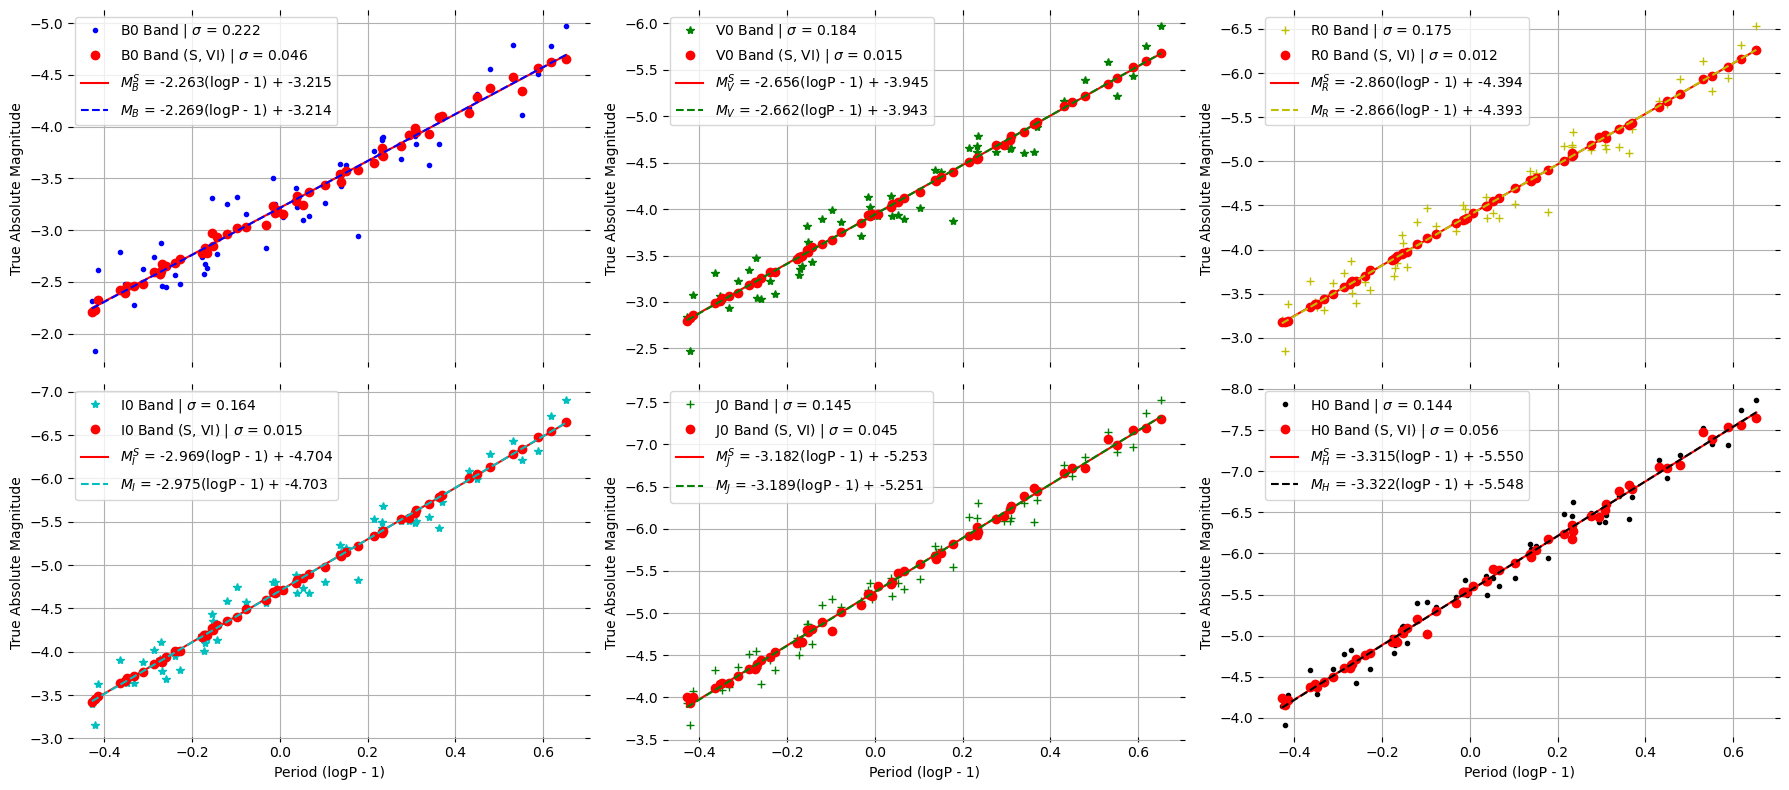

./data/58_madore_3.23/9_plots/8_result/58_PL0_SHK_h.pdf


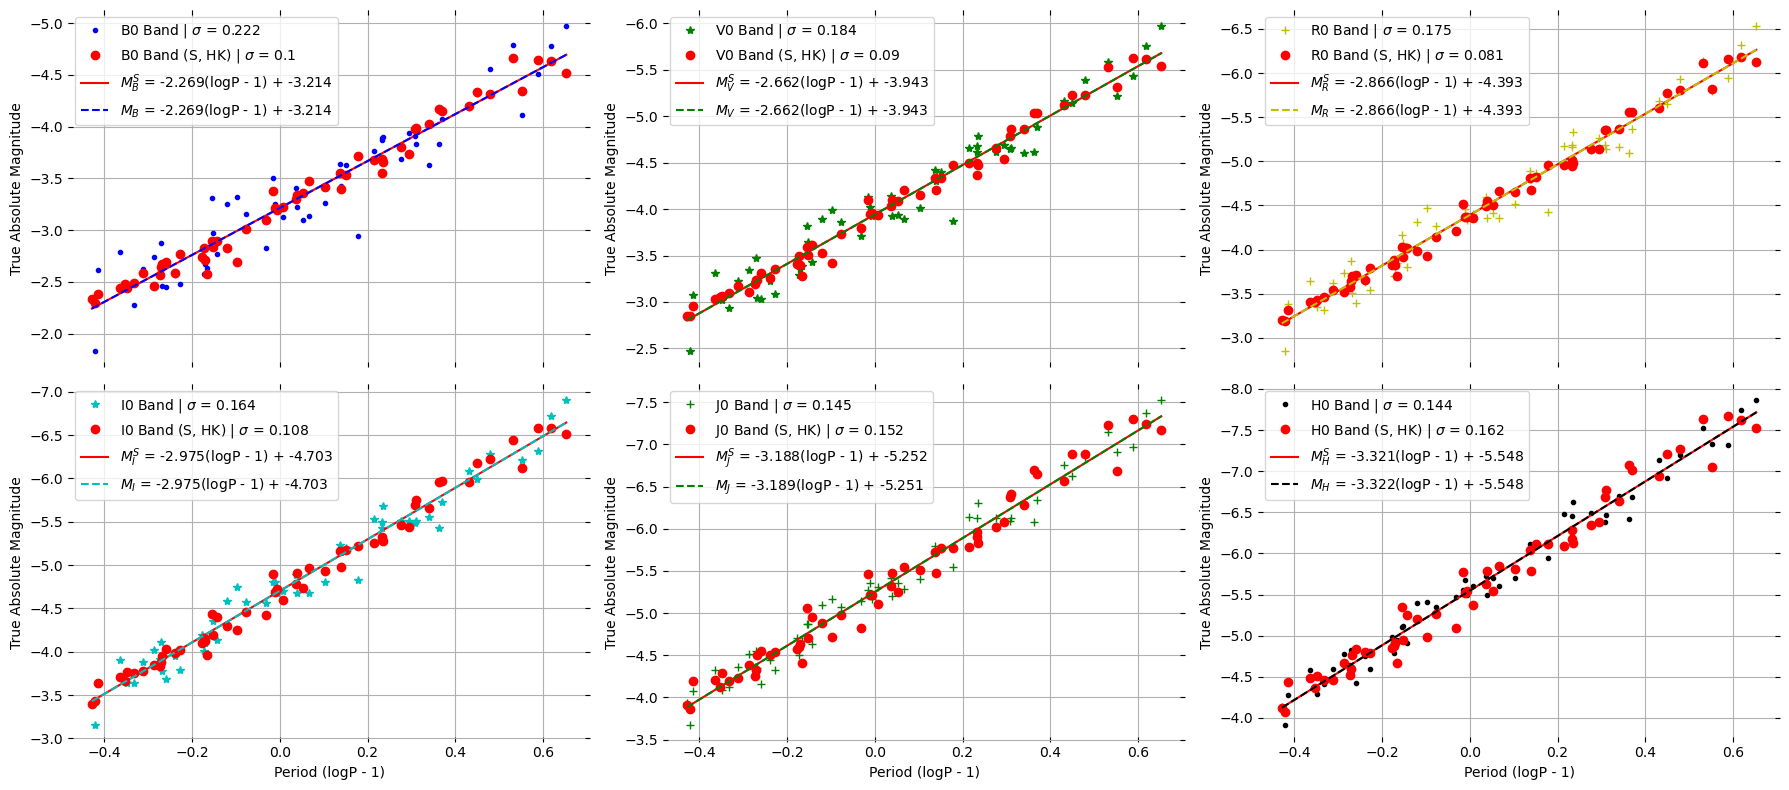

./data/58_madore_3.23/9_plots/8_result/58_PL0_SIJ_h.pdf


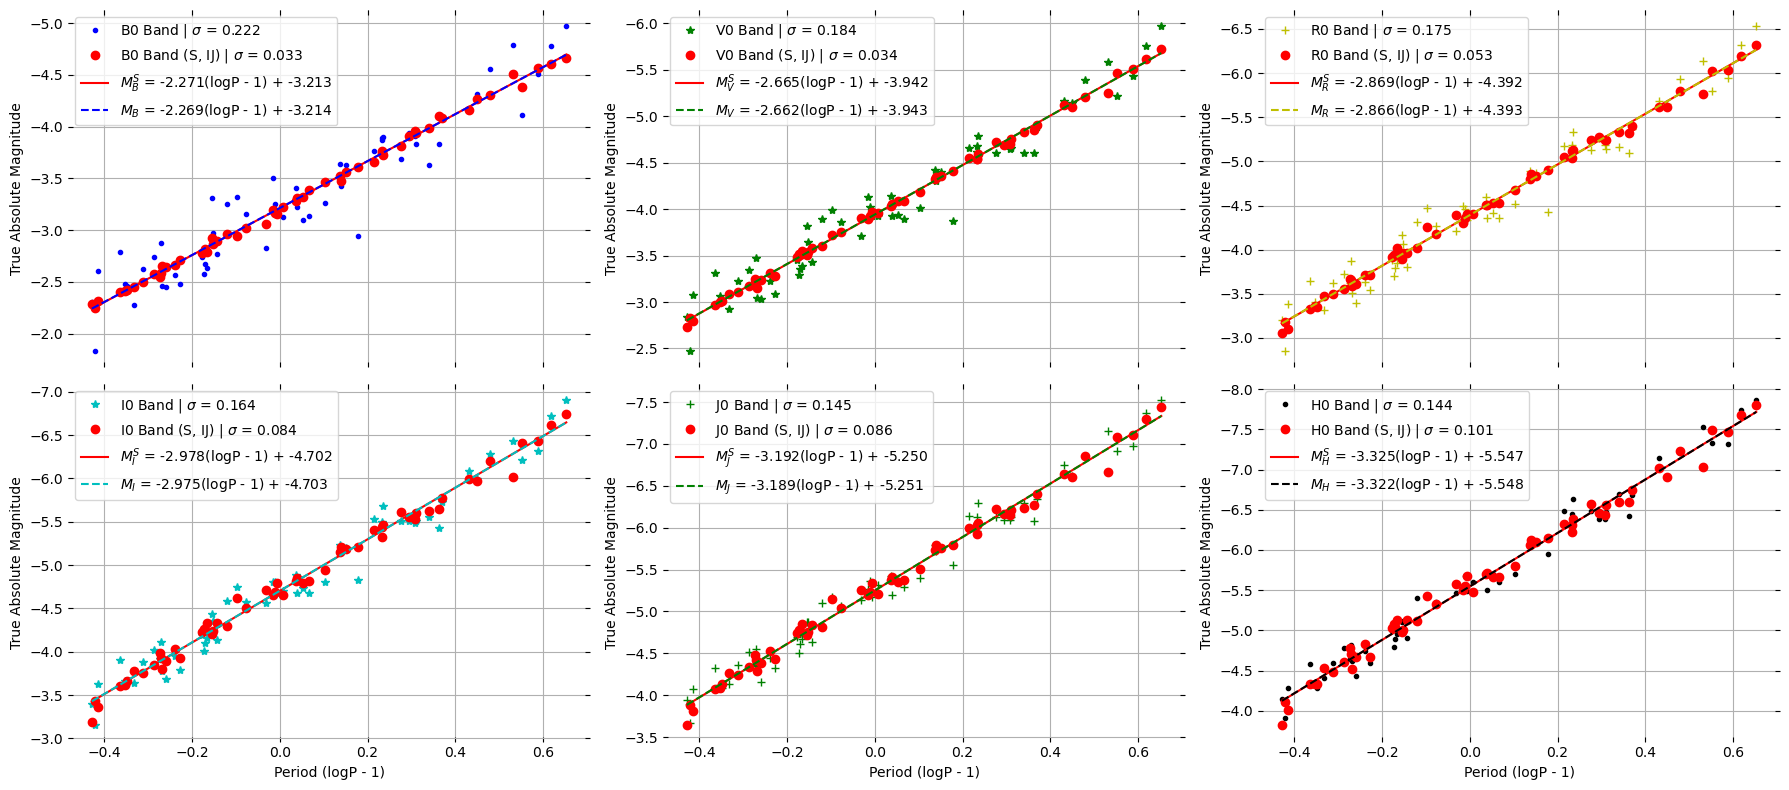

In [1]:
from lvtlaw.g_result import plotresultPL6
from lvtlaw.h_loadoutput import calibrated_result_
from data.datamapping import *
result, reg, res, pre = calibrated_result_()
for col in wes_show[0:3]:
    plotresultPL6(result, reg, col, dis_flag[0], 'S', '0')

# Comparing results

In [16]:
print_PL(reg, result_reg, '_g')

NameError: name 'print_PL' is not defined

In [6]:
print_PL(reg, b, '_i')

PL 	 : 	 Slope 	 	 Intercept

B_i 	 : -1.902365270362809 	 -3.2368862783166827
BV 	 : -1.8835821441673972 	 -3.2500380135887226
VI 	 : -1.887741972928828 	 -3.2458358348232927
VK 	 : -1.8854022064030165 	 -3.2471088409085067
JK 	 : -1.8895861885336316 	 -3.243351471200246
Error 	 : 0.1623501304589864 	 0.0477511187547159
Error BV : 0.0353928241506 	 0.0104098896890447
Error VI : 0.0233486308965719 	 0.0068673997584738
Error VK : 0.0300173254911575 	 0.0088288248994621
Error JK : 0.027369441309753 	 0.0080500178135822

V_i 	 : -2.295980804072152 	 -3.969046309309547
BV 	 : -2.276613325921537 	 -3.9826072012970672
VI 	 : -2.281259868288528 	 -3.978055621143661
VK 	 : -2.2790910137613394 	 -3.9792247145212687
JK 	 : -2.283204067642377 	 -3.975510315608684
Error 	 : 0.1547596707823444 	 0.0455185801026217
Error BV : 0.0364983150273655 	 0.0107350414212266
Error VI : 0.0249108202205645 	 0.0073268776025409
Error VK : 0.0311640772744531 	 0.0091661124669652
Error JK : 0.0208648641885052 	 0.

# LMC and SMC

In [5]:
LMC = pd.read_csv('data/output/8_result/30_corrected.csv')
LMC.head()

Unnamed: 0      logP  mu_lVI   EBV_lVI     V_lVI     I_lVI     J_lVI  \
0           0  1.272209  18.274  0.076487 -4.902054 -5.680209 -6.220140   
1           1  1.152786  17.952  0.135840 -4.604763 -5.339768 -5.845119   
2           2  0.497456  18.263  0.139147 -2.782444 -3.328262 -3.612238   
3           3  0.546887  18.339  0.114623 -2.923231 -3.494100 -3.859107   
4           4  0.421469  18.623  0.127926 -2.530202 -3.048227 -3.096655   

      K_lVI  mu_lVK   EBV_lVK     V_lVK     I_lVK     J_lVK     K_lVK  mu_lJK  \
0 -6.711399  18.374  0.124800 -4.958104 -5.675087 -6.165706 -6.629969  18.434   
1 -6.299213  18.032  0.173104 -4.645127 -5.332949 -5.800265 -6.233536  17.912   
2 -4.004484  18.243  0.131256 -2.776955 -3.332765 -3.624795 -4.021451  18.163   
3 -4.226057  18.319  0.122157 -2.967567 -3.528897 -3.886214 -4.248954  17.919   
4 -3.725171  18.823  0.133827 -2.349262 -2.859815 -2.902220 -3.527439  19.483   

    EBV_lJK     V_lJK     I_lJK     J_lJK     K_lJK  
0  0.137308 -4.938506 -5.639651 -6.117504 -6.574777  
1  0.113819 -4.573634 -5.336521 -5.864349 -6.330748  
2  0.100142 -2.756458 -3.351663 -3.675450 -4.089492  
3 -0.058359 -2.784501 -3.574393 -4.115958 -4.579569  
4  0.690887 -3.488564 -3.293791 -2.767617 -3.081556

In [3]:
new_M.style

In [51]:
LMC = pd.read_csv('data/input/23_LMC.csv')
SMC = pd.read_csv('data/input/32_SMC_VIJK.csv')


xl=LMC['logP']-1
xs=SMC['logP']-1
#xm = new_M['logP']-1
x_str = 'logP - 1'
cl, cs = [], []
for i, m in enumerate(['V', 'I', 'J', 'K']):
    y_str = m
#    yl=LMC[f'{m}_mag']- R[i]*LMC['EBV'] - LMC['IRSB']
    yl=LMC[f'{m}_lJK']#- R[i]*LMC['EBV_lVK'] - LMC['IRSB']
    ys=SMC[f'{m}_mag']- R[i]*SMC['EBV'] - SMC['IRSB']
    rl = regression(xl, yl, x_str, y_str+'l', p = 1)
    cl.append(rl[1])
    rs = regression(xs, ys, x_str, y_str+'s', p = 1)
    cs.append(rs[1])
    #plt.plot(xm, new_M[f'{m}_gVK'], 'k.')
    plt.plot(xl, rl[2], '-')
#    plt.plot(pre['logP']-1, pre[f'p_{m}0_g'], '+')
    plt.plot(new_M['logP']-1, new_M[f'{m}_cVK'], '+')
    #plt.plot(xs, rs[2], '--')
    #plt.show()

KeyError: 'V_lJK'

# Distance to LMC

In [30]:
mod_LMC = pd. DataFrame()
for col in wes_show:
    rcg = result_reg[[f'{m}{col}' for m in mag]].loc[1].values
    mod_LMC[col+'_g'] = cl - rcg
    rci = result_reg[[f'{m}{col}' for m in mag]].loc[5].values
    mod_LMC[col+'_i'] = cl - rci 
    mod_LMC.index = mag
mod_LMC

BV_g       BV_i       VI_g       VI_i       VK_g       VK_i  \
B        NaN        NaN        NaN        NaN        NaN        NaN   
V  18.264942  18.303260  18.264523  18.298709  18.264848  18.299878   
I        NaN        NaN        NaN        NaN        NaN        NaN   
J  18.449318  18.488651  18.448900  18.483301  18.449313  18.484233   
H        NaN        NaN        NaN        NaN        NaN        NaN   
K  18.443674  18.483255  18.443256  18.477710  18.443690  18.478584   

        JK_g       JK_i  
B        NaN        NaN  
V  18.264868  18.296164  
I        NaN        NaN  
J  18.449317  18.480617  
H        NaN        NaN  
K  18.443691  18.474992

# Distance to SMC

In [32]:
mod_SMC = pd. DataFrame()
for col in wes_show:
    rcg = result_reg[[f'{m}{col}' for m in mag]].loc[1].values
    mod_SMC[col+'_g'] = cs - rcg
    rci = result_reg[[f'{m}{col}' for m in mag]].loc[5].values
    mod_SMC[col+'_i'] = cs - rci 
    mod_SMC.index = mag
mod_SMC

BV_g       BV_i       VI_g       VI_i       VK_g       VK_i  \
B        NaN        NaN        NaN        NaN        NaN        NaN   
V  19.092259  19.130577  19.091839  19.126025  19.092165  19.127194   
I  19.088182  19.127062  19.087763  19.122068  19.088137  19.123106   
J  19.009107  19.048440  19.008689  19.043090  19.009102  19.044022   
H        NaN        NaN        NaN        NaN        NaN        NaN   
K  19.016451  19.056031  19.016033  19.050487  19.016467  19.051361   

        JK_g       JK_i  
B        NaN        NaN  
V  19.092185  19.123480  
I  19.088148  19.119446  
J  19.009106  19.040406  
H        NaN        NaN  
K  19.016467  19.047768

In [ ]:
!pdflatex pipeline.tex